# **Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning**   

---
# Data Understanding
---

Because there is no explanation about data, so I took the explanation from [Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis). The following is an explanation from every column:

**People**
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**
- MntCoke: Amount spent on coke in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

---
# Stage 1: Conversion Rate Analysis Based On Income, Spending And Age
---

## Import Library

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import math
import warnings
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [168]:
print (pd.options.display.max_columns)
pd.options.display.max_columns = 100
print (pd.options.display.max_columns)

100
100


In [169]:
sns.set_palette("Set2")
sns.set_style("whitegrid")
colorArr = sns.color_palette("Set2") + sns.color_palette("Set2") + sns.color_palette("Set2")

## Load Dataset

In [170]:
df = pd.read_csv('dataset/marketing_campaign_data.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


## Duplicated Value

In [171]:
df.duplicated().sum()

0

## EDA

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- There is one column (income) that has null value
- The data type of column "Dt_Customer" will be converted to datetime to facilitate easier processing and visualization.

In [173]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntCoke              2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## Missing Value

In [175]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [176]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,S1,Menikah,NaN,1,0,2013-11-15,11,5000,5000,6000,0,2000,1000,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,S1,Lajang,NaN,1,0,2013-02-20,19,5000,1000,3000,3000,263000,362000,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,S3,Lajang,NaN,0,0,2013-11-05,80,81000,11000,50000,3000,2000,39000,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,S1,Lajang,NaN,2,1,2014-01-01,96,48000,5000,48000,6000,10000,7000,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,S1,Lajang,NaN,1,0,2013-06-17,57,11000,3000,22000,2000,2000,6000,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,D3,Menikah,NaN,1,0,2012-09-14,25,25000,3000,43000,17000,4000,17000,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,S3,Menikah,NaN,2,1,2012-11-19,4,230000,42000,192000,49000,37000,53000,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,S1,Lajang,NaN,1,1,2014-05-27,45,7000,0,8000,2000,0,1000,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,S2,Bertunangan,NaN,0,0,2013-11-23,87,445000,37000,359000,98000,28000,18000,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,S3,Menikah,NaN,0,1,2013-07-11,23,352000,0,27000,10000,0,15000,3,6,1,7,6,0,0,0,0,0,0,3,11,0


There are 24 rows in the Income column with missing data (Null values). In order to preserve the data's integrity and considering the relatively low number of Null values (1%), I opted to drop these rows from the dataset.

In [177]:
df.dropna(inplace=True)

In [178]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Feature Engineering

- Age

We can calculate Age by using column Year_Birth

In [179]:
df['Age'] = datetime.date.today().year - df['Year_Birth']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,S1,Menikah,61223000.0,0,1,2013-06-13,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,56
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,2014-06-10,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,77
2237,7270,1981,S1,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,42
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,67


To easiest to represent we can categorize the age with some categories, as following
- Young Adults: 0-39 Years
- Middle Adults: 40-59 Years
- Old Adults: >59 Years

In [180]:
df["Age_Group"] = np.where(df["Age"] < 40, 'Young Adults', 
            (np.where(df["Age"] <= 59 , 'Middle Adults', 'Old Adults')))
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,Old Adults
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,Old Adults
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,Middle Adults
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,Young Adults
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,Middle Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,S1,Menikah,61223000.0,0,1,2013-06-13,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,56,Middle Adults
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,2014-06-10,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,77,Old Adults
2237,7270,1981,S1,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,42,Middle Adults
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,67,Old Adults


- Total Purchases

We can calculate Total purchases by calculating column NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, and NumStorePurchases.

In [181]:
df["Total_purchases"] = df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_purchases
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,Old Adults,25
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,Old Adults,6
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,Middle Adults,21
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,Young Adults,8
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,Middle Adults,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,S1,Menikah,61223000.0,0,1,2013-06-13,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,56,Middle Adults,18
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,2014-06-10,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,77,Old Adults,22
2237,7270,1981,S1,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,42,Middle Adults,19
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,67,Old Adults,23


- Total Amount Spent

We can calculate Total amount spent by calculating column MntCoke, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, and MntGoldProds.

In [182]:
df["Total_amount"] = df["MntCoke"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_purchases,Total_amount
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,Old Adults,25,1617000
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,Old Adults,6,27000
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,Middle Adults,21,776000
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,Young Adults,8,53000
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,Middle Adults,19,422000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,S1,Menikah,61223000.0,0,1,2013-06-13,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,56,Middle Adults,18,1341000
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,2014-06-10,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,77,Old Adults,22,444000
2237,7270,1981,S1,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,42,Middle Adults,19,1241000
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,67,Old Adults,23,843000


- Total Children

We can calculate Total children by calculating column Kidhome and Teenhome.

In [183]:
df["Total_children"] = df["Kidhome"] + df["Teenhome"]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_purchases,Total_amount,Total_children
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,Old Adults,25,1617000,0
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,Old Adults,6,27000,2
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,Middle Adults,21,776000,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,Young Adults,8,53000,1
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,Middle Adults,19,422000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,S1,Menikah,61223000.0,0,1,2013-06-13,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,56,Middle Adults,18,1341000,1
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,2014-06-10,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,77,Old Adults,22,444000,3
2237,7270,1981,S1,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,42,Middle Adults,19,1241000,0
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,67,Old Adults,23,843000,1


To easiest to represent we can categorize the Total_children with question has children? (yes or no)

In [184]:
df['has_children'] = np.where(df["Total_children"] == 0, 0, 1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_purchases,Total_amount,Total_children,has_children
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,Old Adults,25,1617000,0,0
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,Old Adults,6,27000,2,1
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,Middle Adults,21,776000,0,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,Young Adults,8,53000,1,1
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,Middle Adults,19,422000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,S1,Menikah,61223000.0,0,1,2013-06-13,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,56,Middle Adults,18,1341000,1,1
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,2014-06-10,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,77,Old Adults,22,444000,3,1
2237,7270,1981,S1,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,42,Middle Adults,19,1241000,0,0
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,67,Old Adults,23,843000,1,1


- Categorize Income

To easiest represent we can categorize the Income with the division of 10.000.000, as follows:
- 10jt: <20.000.000
- 20jt: <30.000.000
- 30jt: <40.000.000
- 40jt: <50.000.000
- 50jt: <60.000.000
- 60jt: else

In [185]:
df['Income_Group'] = np.where(df["Income"] < 20000000, '10jt', 
                    (np.where(df["Income"] < 30000000 , '20jt', 
                    (np.where(df["Income"] < 40000000 , '30jt', 
                    (np.where(df["Income"] < 50000000 , '40jt', 
                    (np.where(df["Income"] < 60000000 , '50jt', '60jt')))))))))

In [186]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_purchases,Total_amount,Total_children,has_children,Income_Group
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,Old Adults,25,1617000,0,0,50jt
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,Old Adults,6,27000,2,1,40jt
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,Middle Adults,21,776000,0,0,60jt
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,Young Adults,8,53000,1,1,20jt
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,Middle Adults,19,422000,1,1,50jt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,S1,Menikah,61223000.0,0,1,2013-06-13,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,56,Middle Adults,18,1341000,1,1,60jt
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,2014-06-10,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,77,Old Adults,22,444000,3,1,60jt
2237,7270,1981,S1,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,42,Middle Adults,19,1241000,0,0,50jt
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,67,Old Adults,23,843000,1,1,60jt


- Total Accepted Campaign

We can calculate Total Accepted Campaign by calculating column AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, and AcceptedCmp5.

In [187]:
df["Total_AcceptedCmp"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_purchases,Total_amount,Total_children,has_children,Income_Group,Total_AcceptedCmp
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,Old Adults,25,1617000,0,0,50jt,0
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,Old Adults,6,27000,2,1,40jt,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,Middle Adults,21,776000,0,0,60jt,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,Young Adults,8,53000,1,1,20jt,0
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,Middle Adults,19,422000,1,1,50jt,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,S1,Menikah,61223000.0,0,1,2013-06-13,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,56,Middle Adults,18,1341000,1,1,60jt,0
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,2014-06-10,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,77,Old Adults,22,444000,3,1,60jt,1
2237,7270,1981,S1,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,42,Middle Adults,19,1241000,0,0,50jt,1
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,67,Old Adults,23,843000,1,1,60jt,0


- Conversion Rate

We can determine the conversion rate for campaign accepted by calculating the column "Total_AcceptedCmp" as the number of responses and 5 as the number of visits (Total Campaign). 

note: no other column to determine cvr

In [188]:
df['cvr'] = round(df['Total_AcceptedCmp']/5, 2)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_purchases,Total_amount,Total_children,has_children,Income_Group,Total_AcceptedCmp,cvr
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,Old Adults,25,1617000,0,0,50jt,0,0.0
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,Old Adults,6,27000,2,1,40jt,0,0.0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,Middle Adults,21,776000,0,0,60jt,0,0.0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,Young Adults,8,53000,1,1,20jt,0,0.0
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,Middle Adults,19,422000,1,1,50jt,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,S1,Menikah,61223000.0,0,1,2013-06-13,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,56,Middle Adults,18,1341000,1,1,60jt,0,0.0
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,2014-06-10,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,77,Old Adults,22,444000,3,1,60jt,1,0.2
2237,7270,1981,S1,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,42,Middle Adults,19,1241000,0,0,50jt,1,0.2
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,67,Old Adults,23,843000,1,1,60jt,0,0.0


In [189]:
df['cvr'].unique()

array([0. , 0.2, 0.4, 0.6, 0.8])

In [190]:
df[df['cvr'].isin([np.inf, -np.inf])] 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_purchases,Total_amount,Total_children,has_children,Income_Group,Total_AcceptedCmp,cvr


In [191]:
df[df['cvr'].isna()] 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_purchases,Total_amount,Total_children,has_children,Income_Group,Total_AcceptedCmp,cvr


There is some column that has null and infinite values I assumed this because there is some row that has 0 value before division, so I decided to replace the value with 0.

In [192]:
df['cvr'].replace([np.inf, -np.inf], 0,inplace=True)
df['cvr'].fillna(0, inplace=True)

---
# **EDA**
---

## Describe Statistic Dataset

In [193]:
categoric = ['Education', 'Marital_Status', 'Age_Group', 'Income_Group']

In [194]:
numeric = list(df.columns)
numeric = [e for e in numeric if e not in ('Education', 'Marital_Status', 'Age_Group', 'Dt_Customer', 'Income_Group')]

In [195]:
df[numeric].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_purchases,Total_amount,Total_children,has_children,Total_AcceptedCmp,cvr
count,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,5.224725e+07,0.441787,0.505415,49.012635,3.050916e+05,26356.046931,1.669959e+05,37637.635379,27028.880866,43965.252708,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,54.179603,14.880866,6.070754e+05,0.947202,0.714350,0.298285,0.059657
std,3249.376275,11.985554,2.517308e+07,0.536896,0.544181,28.948352,3.373279e+05,39793.916518,2.242833e+05,54752.082415,41072.045667,51815.414374,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,11.985554,7.670957,6.029005e+05,0.749062,0.451825,0.679209,0.135842
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.400000e+04,2000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000,8.000000,6.900000e+04,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.745000e+05,8000.000000,6.800000e+04,12000.000000,8000.000000,24500.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000,15.000000,3.965000e+05,1.000000,1.000000,0.000000,0.000000
75%,8421.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.050000e+05,33000.000000,2.322500e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,64.000000,21.000000,1.048000e+06,1.000000,1.000000,0.000000,0.000000
max,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,262000.000000,321000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000,44.000000,2.525000e+06,3.000000,1.000000,4.000000,0.800000


- There are columns that indicate skew.

In [196]:
df[categoric].describe()

,Education,Marital_Status,Age_Group,Income_Group
count,2216,2216,2216,2216
unique,5,6,3,6
top,S1,Menikah,Middle Adults,60jt
freq,1116,857,1225,842


In [197]:
for i in categoric:
    print('=======================================================================================================')
    print(i, ':', len(df[i].unique()))
    print(i, ':', df[i].unique())

Education : 5
Education : ['S1' 'S3' 'S2' 'SMA' 'D3']
Marital_Status : 6
Marital_Status : ['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']
Age_Group : 3
Age_Group : ['Old Adults' 'Middle Adults' 'Young Adults']
Income_Group : 6
Income_Group : ['50jt' '40jt' '60jt' '20jt' '30jt' '10jt']


- There are no abnormal values.

## Univariate Analysis

### Numerical

Untuk melihat univariate analysis dari data numerik, kami menggunakan **violin plot** untuk mengecek persebaran datanya

In [198]:
df[numeric].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Recency              2216 non-null   int64  
 6   MntCoke              2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   int64 

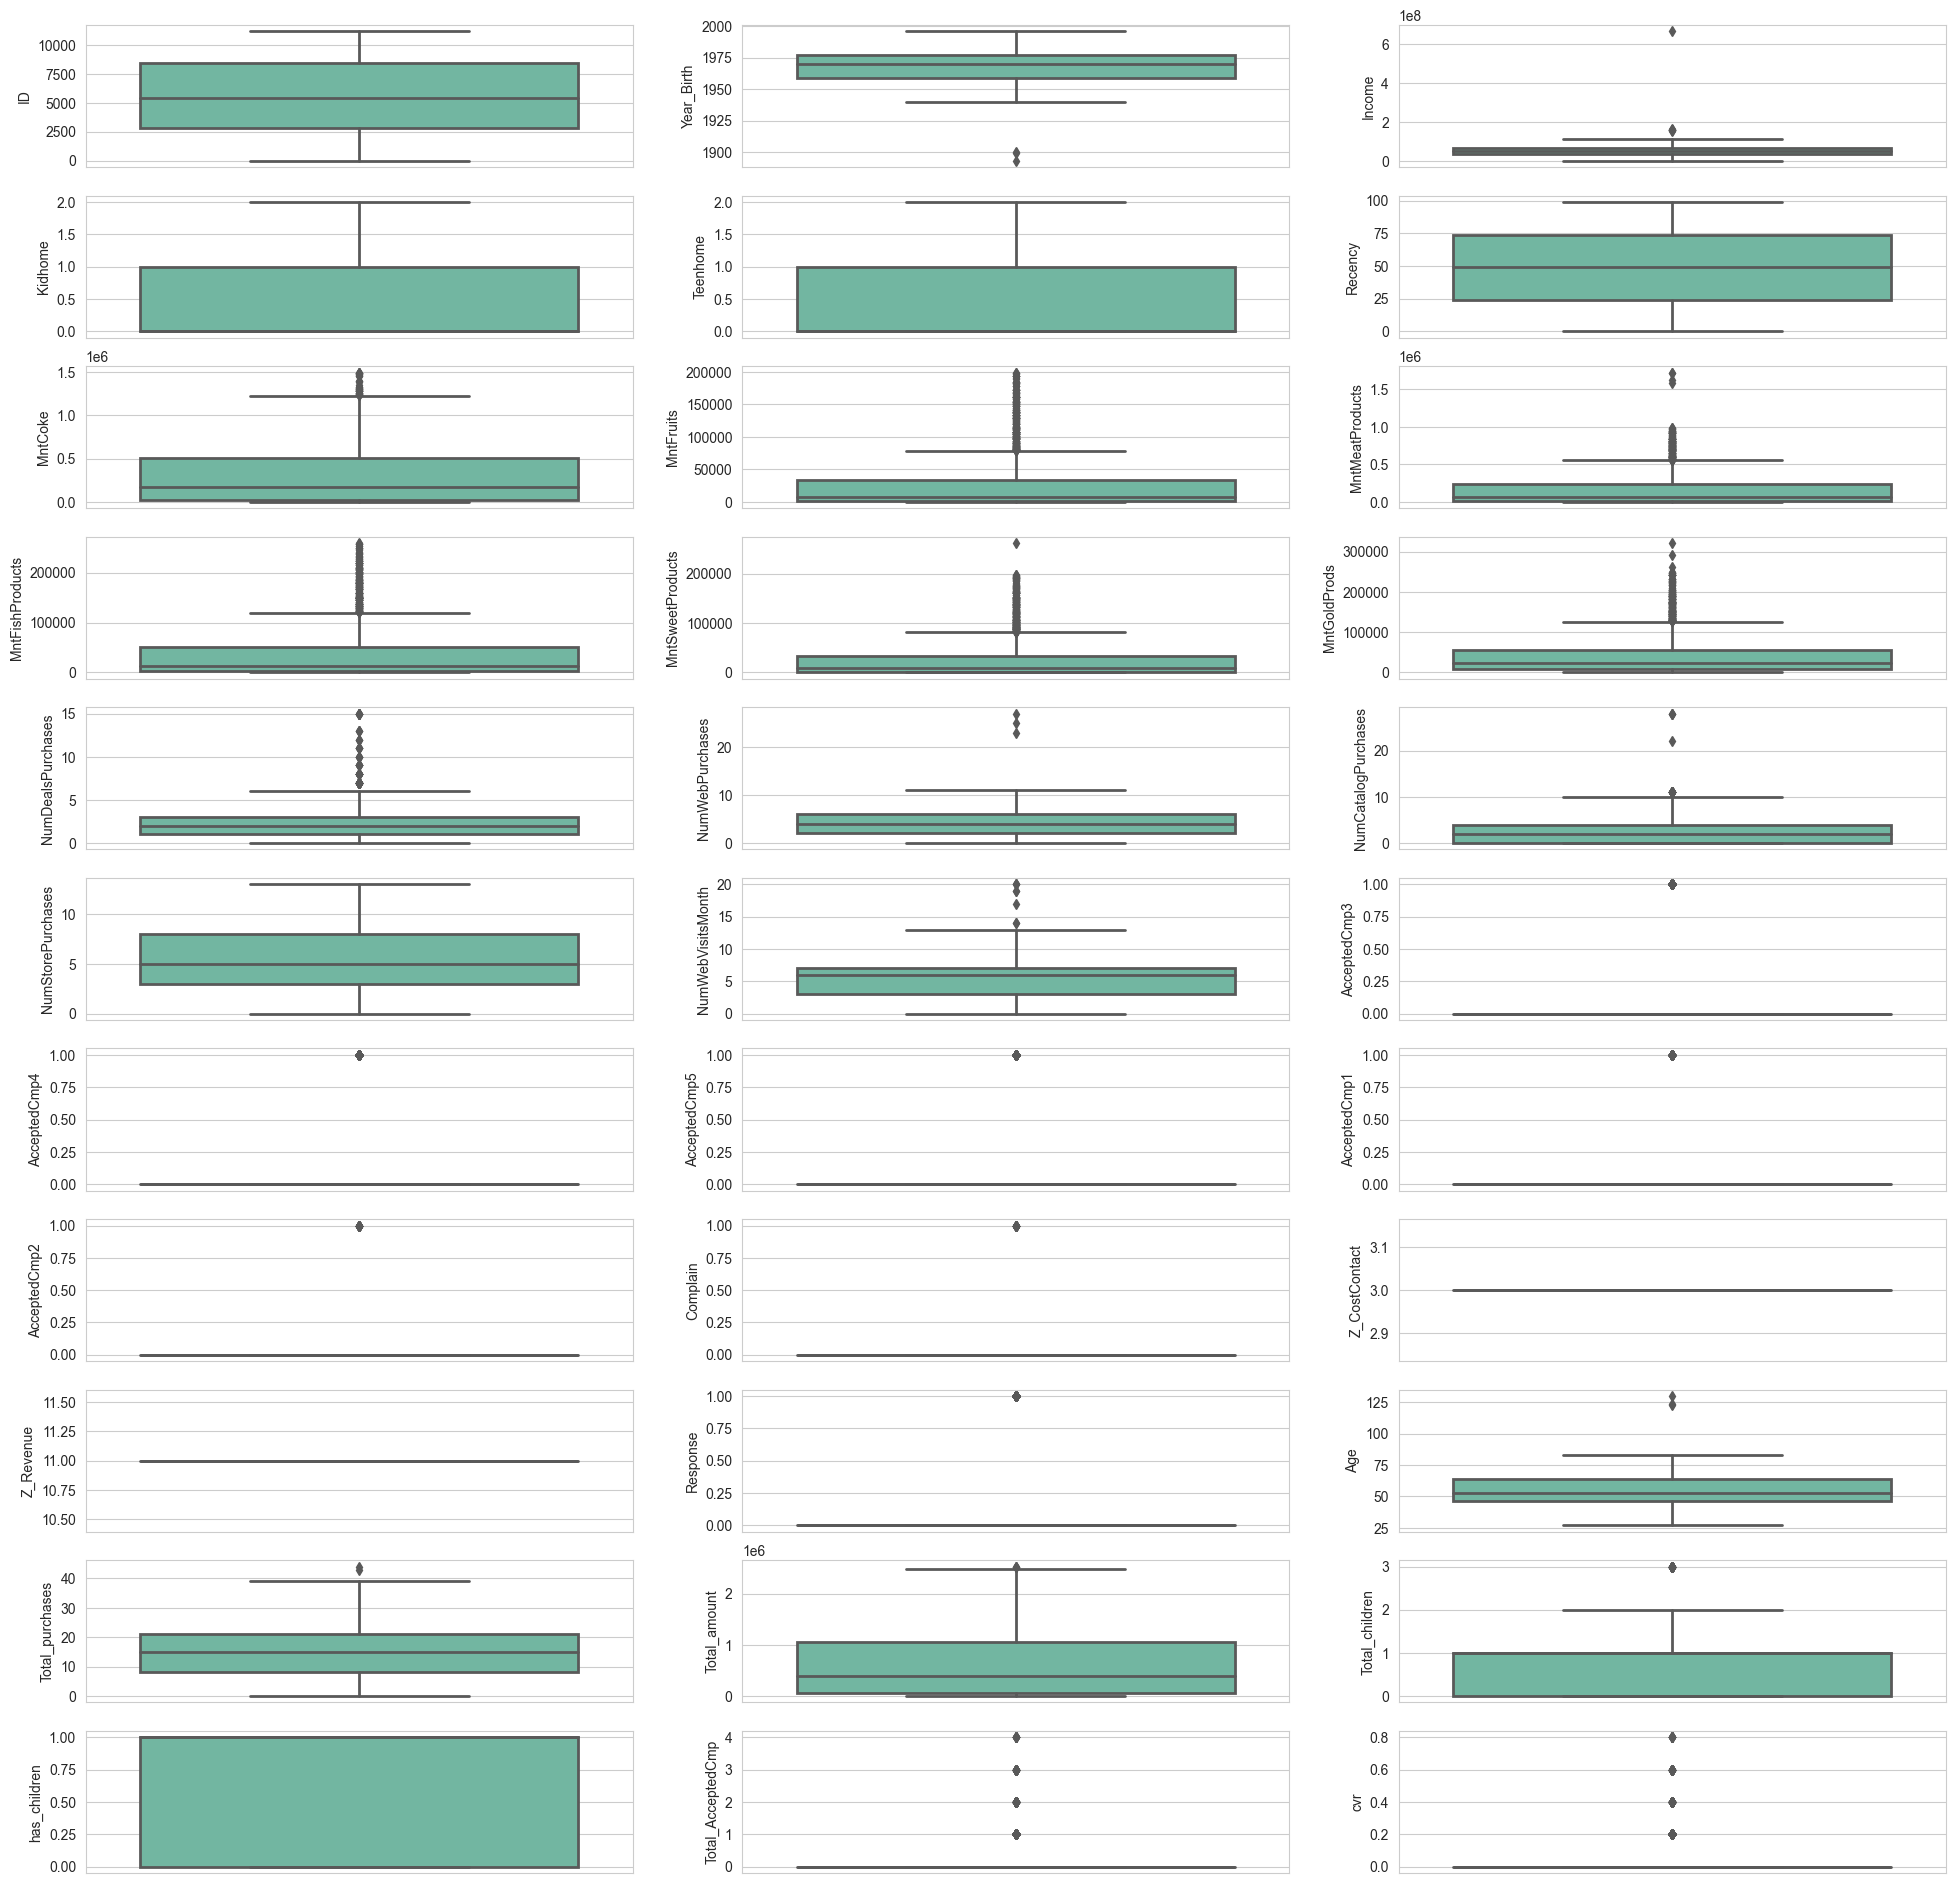

In [199]:
plt.figure(figsize=(24, 24))
for i in range (0, len(numeric)):
  plt.subplot(math.ceil(len(numeric)/3), 3, i+1)
  sns.boxplot(data=df, y=numeric[i], linewidth=2, orient='v')

Some column has abnormal outlier (MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebVisitsMonth, etc) and will be analyzed further in the next session for action that will do.

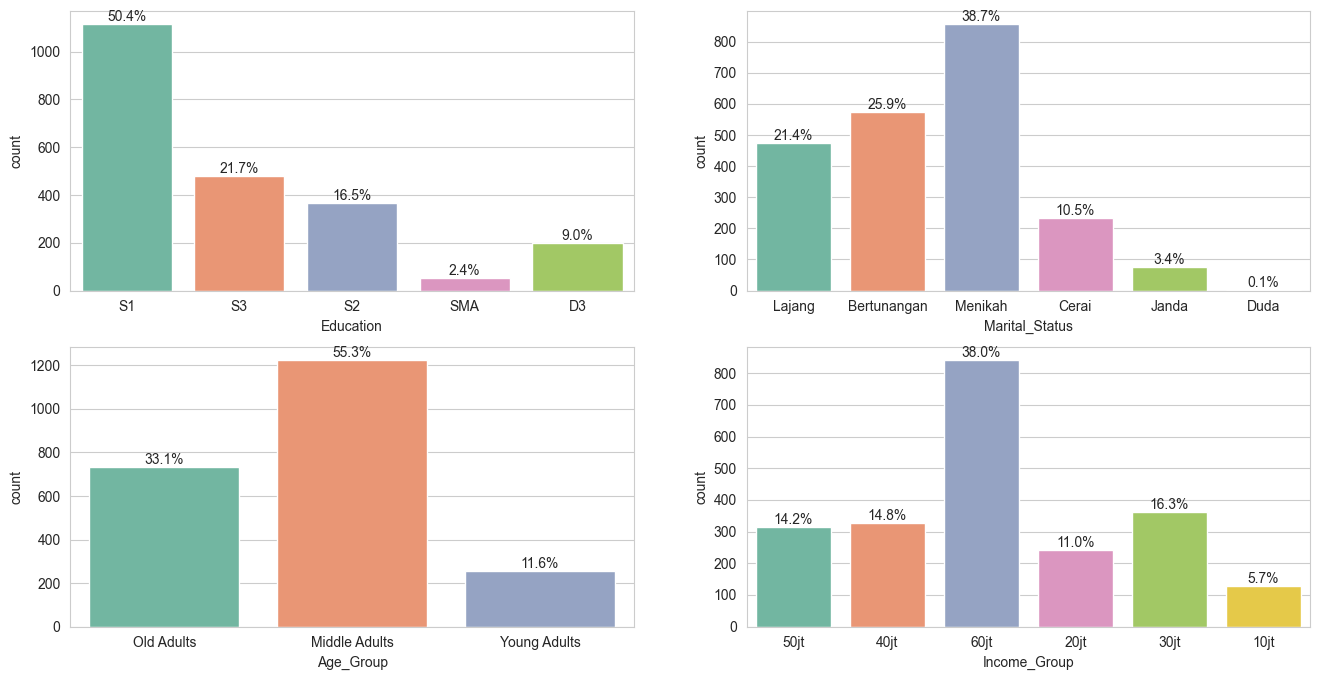

In [200]:
plt.figure(figsize=(16, 8))
for i in range (0, len(categoric)):
  plt.subplot(math.ceil(len(categoric)/2), 2, i+1)
  ax = sns.countplot(data=df, x=categoric[i])
  for c in ax.containers:
    labels = [f'{h/df[categoric[i]].count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

- Education: S1 is the largest percentage(50.4%), and SMA is the smallest percentage (2.4%)
- Marital_Status: Menikah is the largest percentage(38.7%), and Duda is the smallest percentage (0.1%)
- Age_Group: Middle Adults is the largest percentage(55.3%), and Young Adults is the smallest percentage (11.6%)

## Visualization

In [201]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_purchases,Total_amount,Total_children,has_children,Income_Group,Total_AcceptedCmp,cvr
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,Old Adults,25,1617000,0,0,50jt,0,0.0
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,Old Adults,6,27000,2,1,40jt,0,0.0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,Middle Adults,21,776000,0,0,60jt,0,0.0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,Young Adults,8,53000,1,1,20jt,0,0.0
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,Middle Adults,19,422000,1,1,50jt,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,S1,Menikah,61223000.0,0,1,2013-06-13,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,56,Middle Adults,18,1341000,1,1,60jt,0,0.0
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,2014-06-10,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,77,Old Adults,22,444000,3,1,60jt,1,0.2
2237,7270,1981,S1,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,42,Middle Adults,19,1241000,0,0,50jt,1,0.2
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,67,Old Adults,23,843000,1,1,60jt,0,0.0


- Conversion Rate based on Age

In [202]:
cvr_age = df.groupby(['Age_Group']).agg({
    'cvr' : ['mean']
}).reset_index()
cvr_age.columns = ['Age_Group', 'cvr_mean']
sorted_cvr_age = ['Young Adults', 'Middle Adults', 'Old Adults']
cvr_age['Age_Group'] = pd.Categorical(cvr_age['Age_Group'], sorted_cvr_age)
cvr_age.sort_values(['Age_Group'])
cvr_age

,Age_Group,cvr_mean
0,Middle Adults,0.054041
1,Old Adults,0.064033
2,Young Adults,0.073930


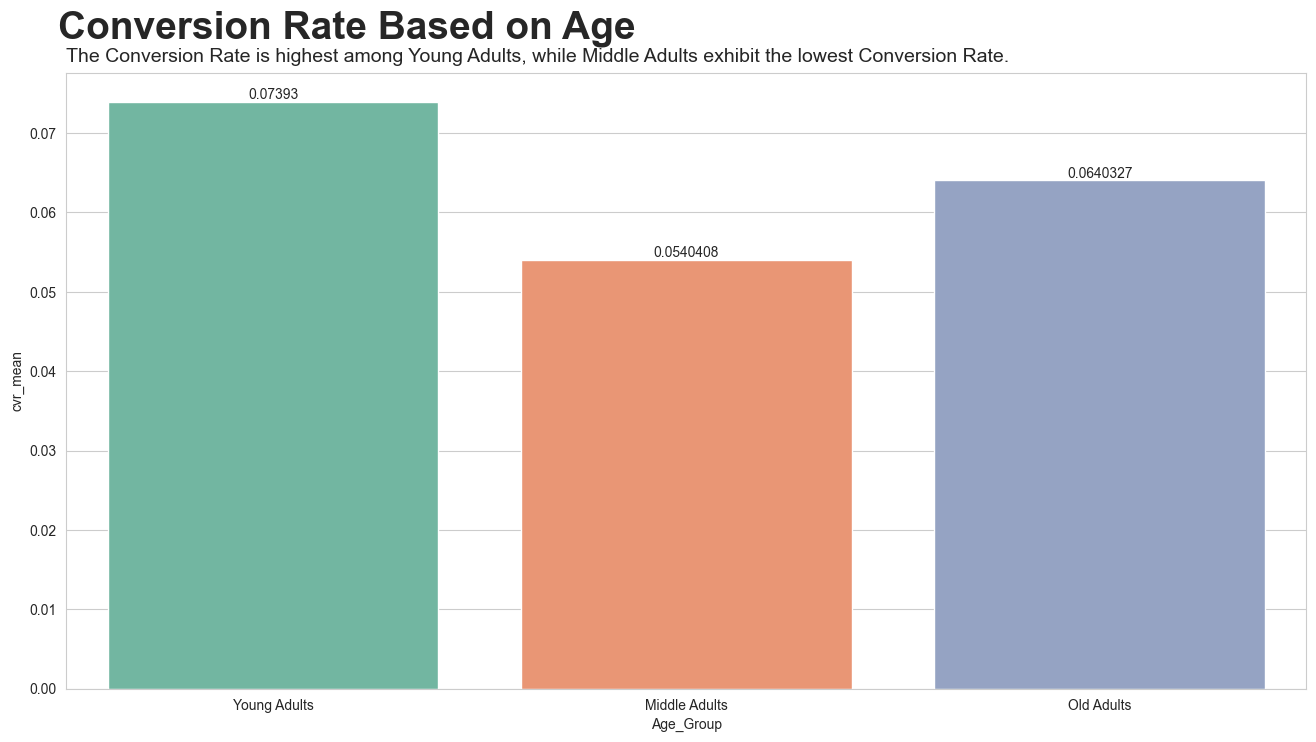

In [203]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Age_Group', y='cvr_mean', data=cvr_age)
for i in ax.containers:
    ax.bar_label(i)
plt.text(x = -0.52, y = 0.082, 
         s = "Conversion Rate Based on Age",
         fontsize = 28, weight = 'bold')

plt.text(x = -0.5, y = 0.079,
         s = "The Conversion Rate is highest among Young Adults, while Middle Adults exhibit the lowest Conversion Rate.",
         fontsize = 14)
plt.show()

Young Adults demonstrate the highest Conversion Rate. The assumption is based on the assumption that younger individuals may be more inclined to take advantage of the campaign compared to Old and Middle Adults. This is because Young Adults prioritize saving money for future needs.

- Conversion Rate based on Marital Status

In [204]:
cvr_maritalstatus = df.groupby(['Marital_Status']).agg({
    'cvr' : ['mean']
}).reset_index()
cvr_maritalstatus.columns = ['Marital_Status', 'cvr_mean']
cvr_maritalstatus

,Marital_Status,cvr_mean
0,Bertunangan,0.058290
1,Cerai,0.058621
2,Duda,0.066667
3,Janda,0.071053
4,Lajang,0.058105
5,Menikah,0.060677


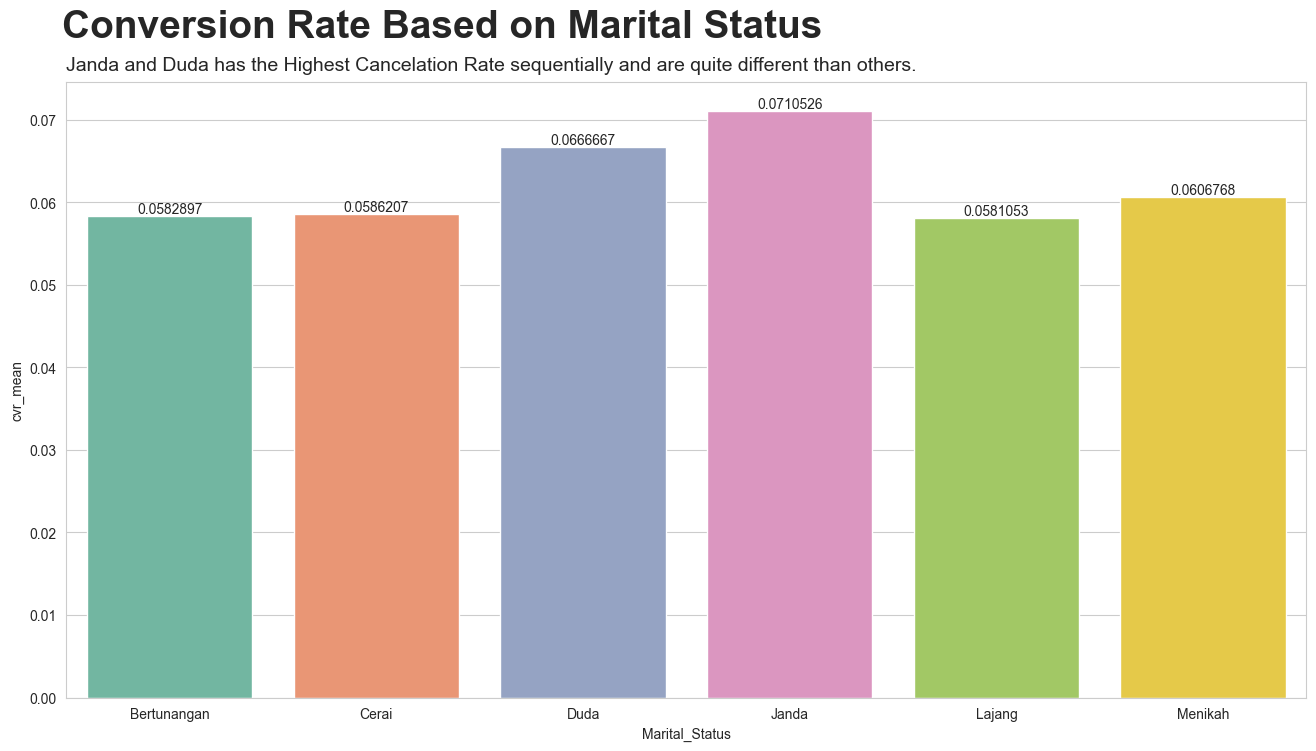

In [205]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Marital_Status', y='cvr_mean', data=cvr_maritalstatus)
for i in ax.containers:
    ax.bar_label(i)
plt.text(x = -0.52, y = 0.08, 
         s = "Conversion Rate Based on Marital Status",
         fontsize = 28, weight = 'bold')

plt.text(x = -0.5, y = 0.076,
         s = "Janda and Duda has the Highest Cancelation Rate sequentially and are quite different than others.",
         fontsize = 14)
plt.show()

"Janda" and "Duda" show the highest Cancelation Rate sequentially, and they significantly differ from others. The assumption is that these categories may be more inclined to take advantage of campaigns compared to others.

- Conversion Rate based on Education

In [206]:
cvr_education = df.groupby(['Education']).agg({
    'cvr' : ['mean']
}).reset_index()
sorted_cvr_education = ['SMA', 'D3', 'S1', 'S2', 'S3']
cvr_education['Education'] = pd.Categorical(cvr_education['Education'], sorted_cvr_education)
cvr_education.sort_values(['Education'])
cvr_education.columns = ['Education', 'cvr_mean']
cvr_education

,Education,cvr_mean
0,D3,0.050000
1,S1,0.060753
2,S2,0.055890
3,S3,0.068191
4,SMA,0.022222


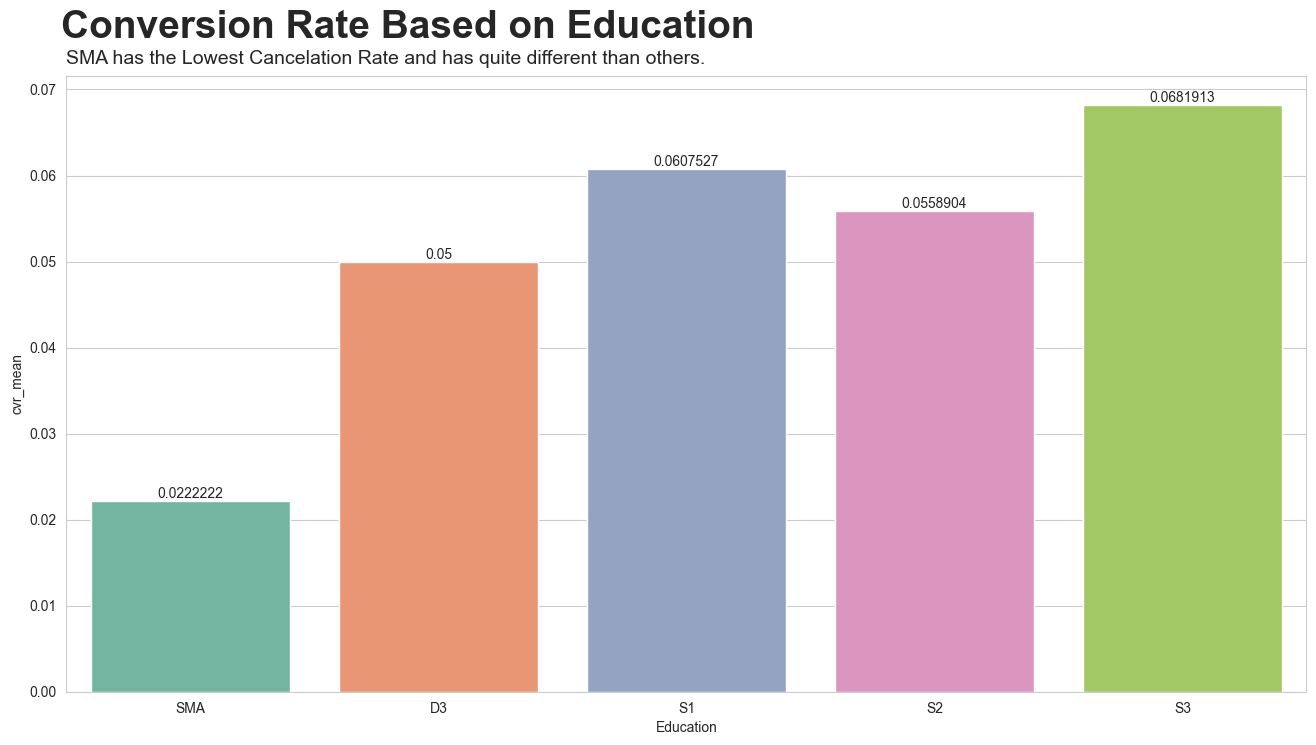

In [207]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Education', y='cvr_mean', data=cvr_education)
for i in ax.containers:
    ax.bar_label(i)
plt.text(x = -0.52, y = 0.076, 
         s = "Conversion Rate Based on Education",
         fontsize = 28, weight = 'bold')

plt.text(x = -0.5, y = 0.073,
         s = "SMA has the Lowest Cancelation Rate and has quite different than others.",
         fontsize = 14)
plt.show()

SMA may not have essential many needs and doesn't have much income do they have the least CVR.

- Conversion Rate based on Children

In [208]:
cvr_haschildren = df.groupby(['has_children']).agg({
    'cvr' : ['mean']
}).reset_index()
cvr_haschildren.columns = ['has_children', 'cvr_mean']
cvr_haschildren

,has_children,cvr_mean
0,0,0.119747
1,1,0.035629


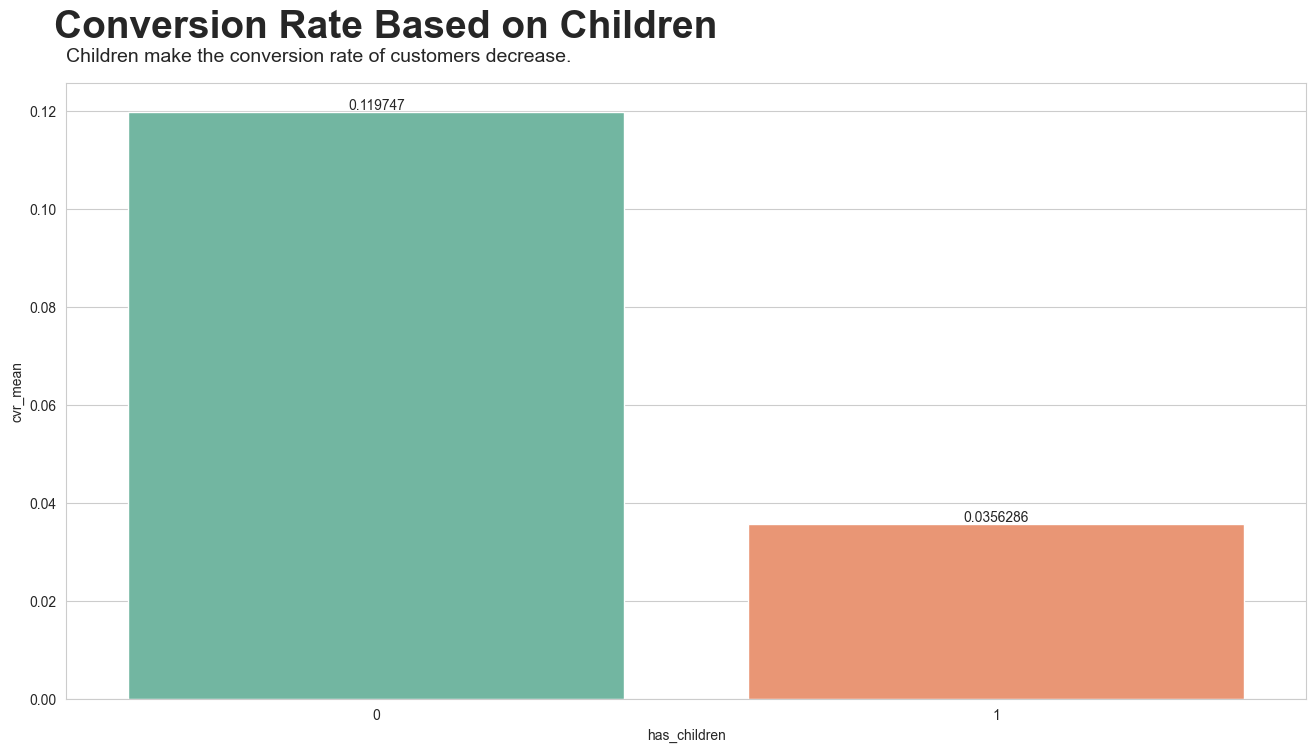

In [209]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='has_children', y='cvr_mean', data=cvr_haschildren)
for i in ax.containers:
    ax.bar_label(i)
plt.text(x = -0.52, y = 0.135, 
         s = "Conversion Rate Based on Children",
         fontsize = 28, weight = 'bold')

plt.text(x = -0.5, y = 0.13,
         s = "Children make the conversion rate of customers decrease.",
         fontsize = 14)
plt.show()

The presence of children among customers often leads to a greater focus on saving money, making them more discerning in their purchasing decisions. As a result, customers with children tend to have a much lower Conversion Rate (CVR) compared to those without children. The additional financial responsibilities associated with raising a family may contribute to a more cautious and selective approach to spending among customers with children.

- Conversion Rate based on Income

In [210]:
cvr_income = df.groupby(['Income_Group']).agg({
    'cvr' : ['mean']
}).reset_index()
cvr_income.columns = ['Income_Group', 'cvr_mean']
cvr_income

,Income_Group,cvr_mean
0,10jt,0.020472
1,20jt,0.010700
2,30jt,0.021547
3,40jt,0.029268
4,50jt,0.043312
5,60jt,0.114014


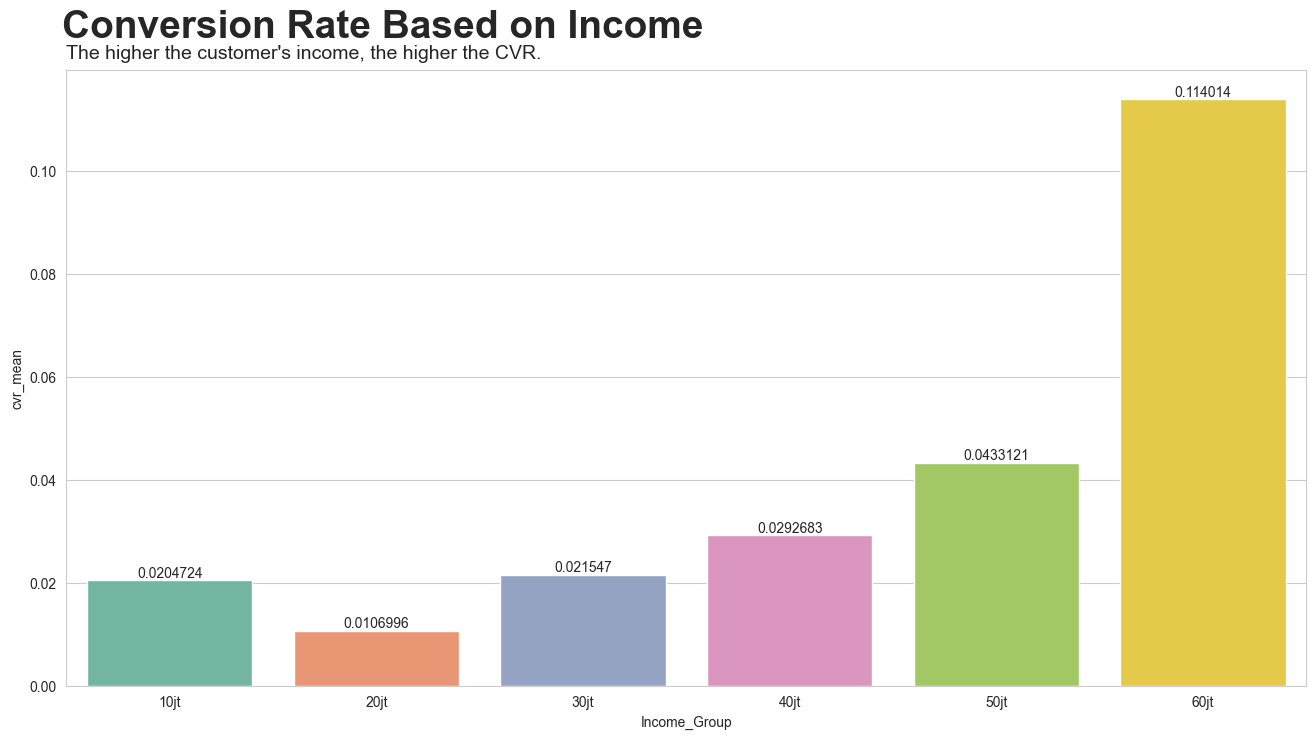

In [211]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Income_Group', y='cvr_mean', data=cvr_income)
for i in ax.containers:
    ax.bar_label(i)
plt.text(x = -0.52, y = 0.126, 
         s = "Conversion Rate Based on Income",
         fontsize = 28, weight = 'bold')

plt.text(x = -0.5, y = 0.122,
         s = "The higher the customer's income, the higher the CVR.",
         fontsize = 14)
plt.show()

There is a positive correlation between a customer's income level and their Conversion Rate (CVR). As the customer's income increases, the likelihood of conversion also tends to rise. This suggests that customers with higher incomes may be more willing or able to make purchases so more take the campaign, contributing to a higher CVR compared to those with lower incomes.

---
# **Data Preprocessing**
---

## Duplicate Value

In [212]:
df.duplicated().sum()

0

There is no duplicate value.

## Missing Value

In [213]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
Age_Group              0
Total_purchases        0
Total_amount           0
Total_children         0
has_children           0
Income_Group           0
Total_AcceptedCmp      0
cvr                    0
dtype: int64

No missing values exist since they have already been addressed in the previous step by dropping the rows where missing values were present.

## Feature Encoding

In [214]:
df_cluster = df.copy()

- Label Encoding

Firstly, we can apply label encoding to the Education column, as education reflects different levels of educational attainment. Utilizing label encoding is suitable for this purpose.

In [215]:
df_cluster['Education'].unique()

array(['S1', 'S3', 'S2', 'SMA', 'D3'], dtype=object)

In [216]:
mapping_Education={
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}
df_cluster['Education'] = df_cluster['Education'].map(mapping_Education)
df_cluster

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_purchases,Total_amount,Total_children,has_children,Income_Group,Total_AcceptedCmp,cvr
0,5524,1957,2,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,Old Adults,25,1617000,0,0,50jt,0,0.0
1,2174,1954,2,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,Old Adults,6,27000,2,1,40jt,0,0.0
2,4141,1965,2,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,Middle Adults,21,776000,0,0,60jt,0,0.0
3,6182,1984,2,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,Young Adults,8,53000,1,1,20jt,0,0.0
4,5324,1981,4,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,Middle Adults,19,422000,1,1,50jt,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,Menikah,61223000.0,0,1,2013-06-13,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,56,Middle Adults,18,1341000,1,1,60jt,0,0.0
2236,4001,1946,4,Bertunangan,64014000.0,2,1,2014-06-10,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,77,Old Adults,22,444000,3,1,60jt,1,0.2
2237,7270,1981,2,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,42,Middle Adults,19,1241000,0,0,50jt,1,0.2
2238,8235,1956,3,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,67,Old Adults,23,843000,1,1,60jt,0,0.0


In [217]:
df_cluster['Education'].unique()

array([2, 4, 3, 0, 1], dtype=int64)

Subsequently, label encoding can be applied to the Income Group column, as it represents different income levels.

In [218]:
df_cluster['Income_Group'].unique()

array(['50jt', '40jt', '60jt', '20jt', '30jt', '10jt'], dtype=object)

In [219]:
mapping_incomeGroup ={
    '10jt' : 0,
    '20jt' : 1,
    '30jt' : 2,
    '40jt' : 3,
    '50jt' : 4,
    '60jt' : 5
}

df_cluster['Income_Group'] = df_cluster['Income_Group'].map(mapping_incomeGroup)
df_cluster

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_purchases,Total_amount,Total_children,has_children,Income_Group,Total_AcceptedCmp,cvr
0,5524,1957,2,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,Old Adults,25,1617000,0,0,4,0,0.0
1,2174,1954,2,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,Old Adults,6,27000,2,1,3,0,0.0
2,4141,1965,2,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,Middle Adults,21,776000,0,0,5,0,0.0
3,6182,1984,2,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,Young Adults,8,53000,1,1,1,0,0.0
4,5324,1981,4,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,Middle Adults,19,422000,1,1,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,Menikah,61223000.0,0,1,2013-06-13,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,56,Middle Adults,18,1341000,1,1,5,0,0.0
2236,4001,1946,4,Bertunangan,64014000.0,2,1,2014-06-10,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,77,Old Adults,22,444000,3,1,5,1,0.2
2237,7270,1981,2,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,42,Middle Adults,19,1241000,0,0,4,1,0.2
2238,8235,1956,3,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,67,Old Adults,23,843000,1,1,5,0,0.0


In [220]:
df_cluster['Income_Group'].unique()

array([4, 3, 5, 1, 2, 0], dtype=int64)

Finally, label encoding can be implemented on the Age_Group column, as it signifies different age level.

In [221]:
df_cluster['Age_Group'].unique()

array(['Old Adults', 'Middle Adults', 'Young Adults'], dtype=object)

In [222]:
mapping_ageGroup ={
    'Young Adults' : 0,
    'Middle Adults' : 1,
    'Old Adults' : 2
}

df_cluster['Age_Group'] = df_cluster['Age_Group'].map(mapping_ageGroup)
df_cluster

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_purchases,Total_amount,Total_children,has_children,Income_Group,Total_AcceptedCmp,cvr
0,5524,1957,2,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,2,25,1617000,0,0,4,0,0.0
1,2174,1954,2,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,2,6,27000,2,1,3,0,0.0
2,4141,1965,2,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,1,21,776000,0,0,5,0,0.0
3,6182,1984,2,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,0,8,53000,1,1,1,0,0.0
4,5324,1981,4,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,1,19,422000,1,1,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,Menikah,61223000.0,0,1,2013-06-13,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,56,1,18,1341000,1,1,5,0,0.0
2236,4001,1946,4,Bertunangan,64014000.0,2,1,2014-06-10,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,77,2,22,444000,3,1,5,1,0.2
2237,7270,1981,2,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,42,1,19,1241000,0,0,4,1,0.2
2238,8235,1956,3,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,67,2,23,843000,1,1,5,0,0.0


In [223]:
df_cluster['Age_Group'].unique()

array([2, 1, 0], dtype=int64)

- One Hot Encoding

And for column Marital_Status because doesn't qualify to use label encoding, it will use One Hot Encoding.

In [224]:
df_cluster['Marital_Status'].unique()

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

In [225]:
df_cluster = pd.get_dummies(df_cluster, columns = ['Marital_Status']) 
df_cluster['Marital_Status_Bertunangan'] = df_cluster['Marital_Status_Bertunangan'].astype(int)
df_cluster['Marital_Status_Cerai'] = df_cluster['Marital_Status_Cerai'].astype(int)
df_cluster['Marital_Status_Duda'] = df_cluster['Marital_Status_Duda'].astype(int)
df_cluster['Marital_Status_Janda'] = df_cluster['Marital_Status_Janda'].astype(int)
df_cluster['Marital_Status_Lajang'] = df_cluster['Marital_Status_Lajang'].astype(int)
df_cluster['Marital_Status_Menikah'] = df_cluster['Marital_Status_Menikah'].astype(int)
df_cluster

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_purchases,Total_amount,Total_children,has_children,Income_Group,Total_AcceptedCmp,cvr,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
0,5524,1957,2,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,2,25,1617000,0,0,4,0,0.0,0,0,0,0,1,0
1,2174,1954,2,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,2,6,27000,2,1,3,0,0.0,0,0,0,0,1,0
2,4141,1965,2,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,1,21,776000,0,0,5,0,0.0,1,0,0,0,0,0
3,6182,1984,2,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,0,8,53000,1,1,1,0,0.0,1,0,0,0,0,0
4,5324,1981,4,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,1,19,422000,1,1,4,0,0.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,61223000.0,0,1,2013-06-13,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,56,1,18,1341000,1,1,5,0,0.0,0,0,0,0,0,1
2236,4001,1946,4,64014000.0,2,1,2014-06-10,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,77,2,22,444000,3,1,5,1,0.2,1,0,0,0,0,0
2237,7270,1981,2,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,42,1,19,1241000,0,0,4,1,0.2,0,1,0,0,0,0
2238,8235,1956,3,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,67,2,23,843000,1,1,5,0,0.0,1,0,0,0,0,0


## Feature Selection

In [226]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_purchases,Total_amount,Total_children,has_children,Income_Group,Total_AcceptedCmp,cvr
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,Old Adults,25,1617000,0,0,50jt,0,0.0
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,Old Adults,6,27000,2,1,40jt,0,0.0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,Middle Adults,21,776000,0,0,60jt,0,0.0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,Young Adults,8,53000,1,1,20jt,0,0.0
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,Middle Adults,19,422000,1,1,50jt,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,S1,Menikah,61223000.0,0,1,2013-06-13,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,56,Middle Adults,18,1341000,1,1,60jt,0,0.0
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,2014-06-10,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,77,Old Adults,22,444000,3,1,60jt,1,0.2
2237,7270,1981,S1,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,42,Middle Adults,19,1241000,0,0,50jt,1,0.2
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,67,Old Adults,23,843000,1,1,60jt,0,0.0


Only specific columns will be utilized for further process, including 'Education', 'Marital_Status', 'cvr', 'Age_Group', 'Total_purchases', 'Total_amount', 'has_children', 'Income_Group', and 'Total_AcceptedCmp', as other columns are already represented by these selected ones.

In [227]:
selection_feature = ['Education', 'cvr', 'Age_Group', 'Total_purchases', 'Total_amount', 'has_children', 'Income_Group', 'Total_AcceptedCmp', 'Marital_Status_Bertunangan', 'Marital_Status_Cerai', 'Marital_Status_Duda', 'Marital_Status_Janda', 'Marital_Status_Lajang', 'Marital_Status_Menikah']

In [228]:
df_cluster = df_cluster[selection_feature]
df_cluster

,Education,cvr,Age_Group,Total_purchases,Total_amount,has_children,Income_Group,Total_AcceptedCmp,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
0,2,0.0,2,25,1617000,0,4,0,0,0,0,0,1,0
1,2,0.0,2,6,27000,1,3,0,0,0,0,0,1,0
2,2,0.0,1,21,776000,0,5,0,1,0,0,0,0,0
3,2,0.0,0,8,53000,1,1,0,1,0,0,0,0,0
4,4,0.0,1,19,422000,1,4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,0.0,1,18,1341000,1,5,0,0,0,0,0,0,1
2236,4,0.2,2,22,444000,1,5,1,1,0,0,0,0,0
2237,2,0.2,1,19,1241000,0,4,1,0,1,0,0,0,0
2238,3,0.0,2,23,843000,1,5,0,1,0,0,0,0,0


## Handling Outlier

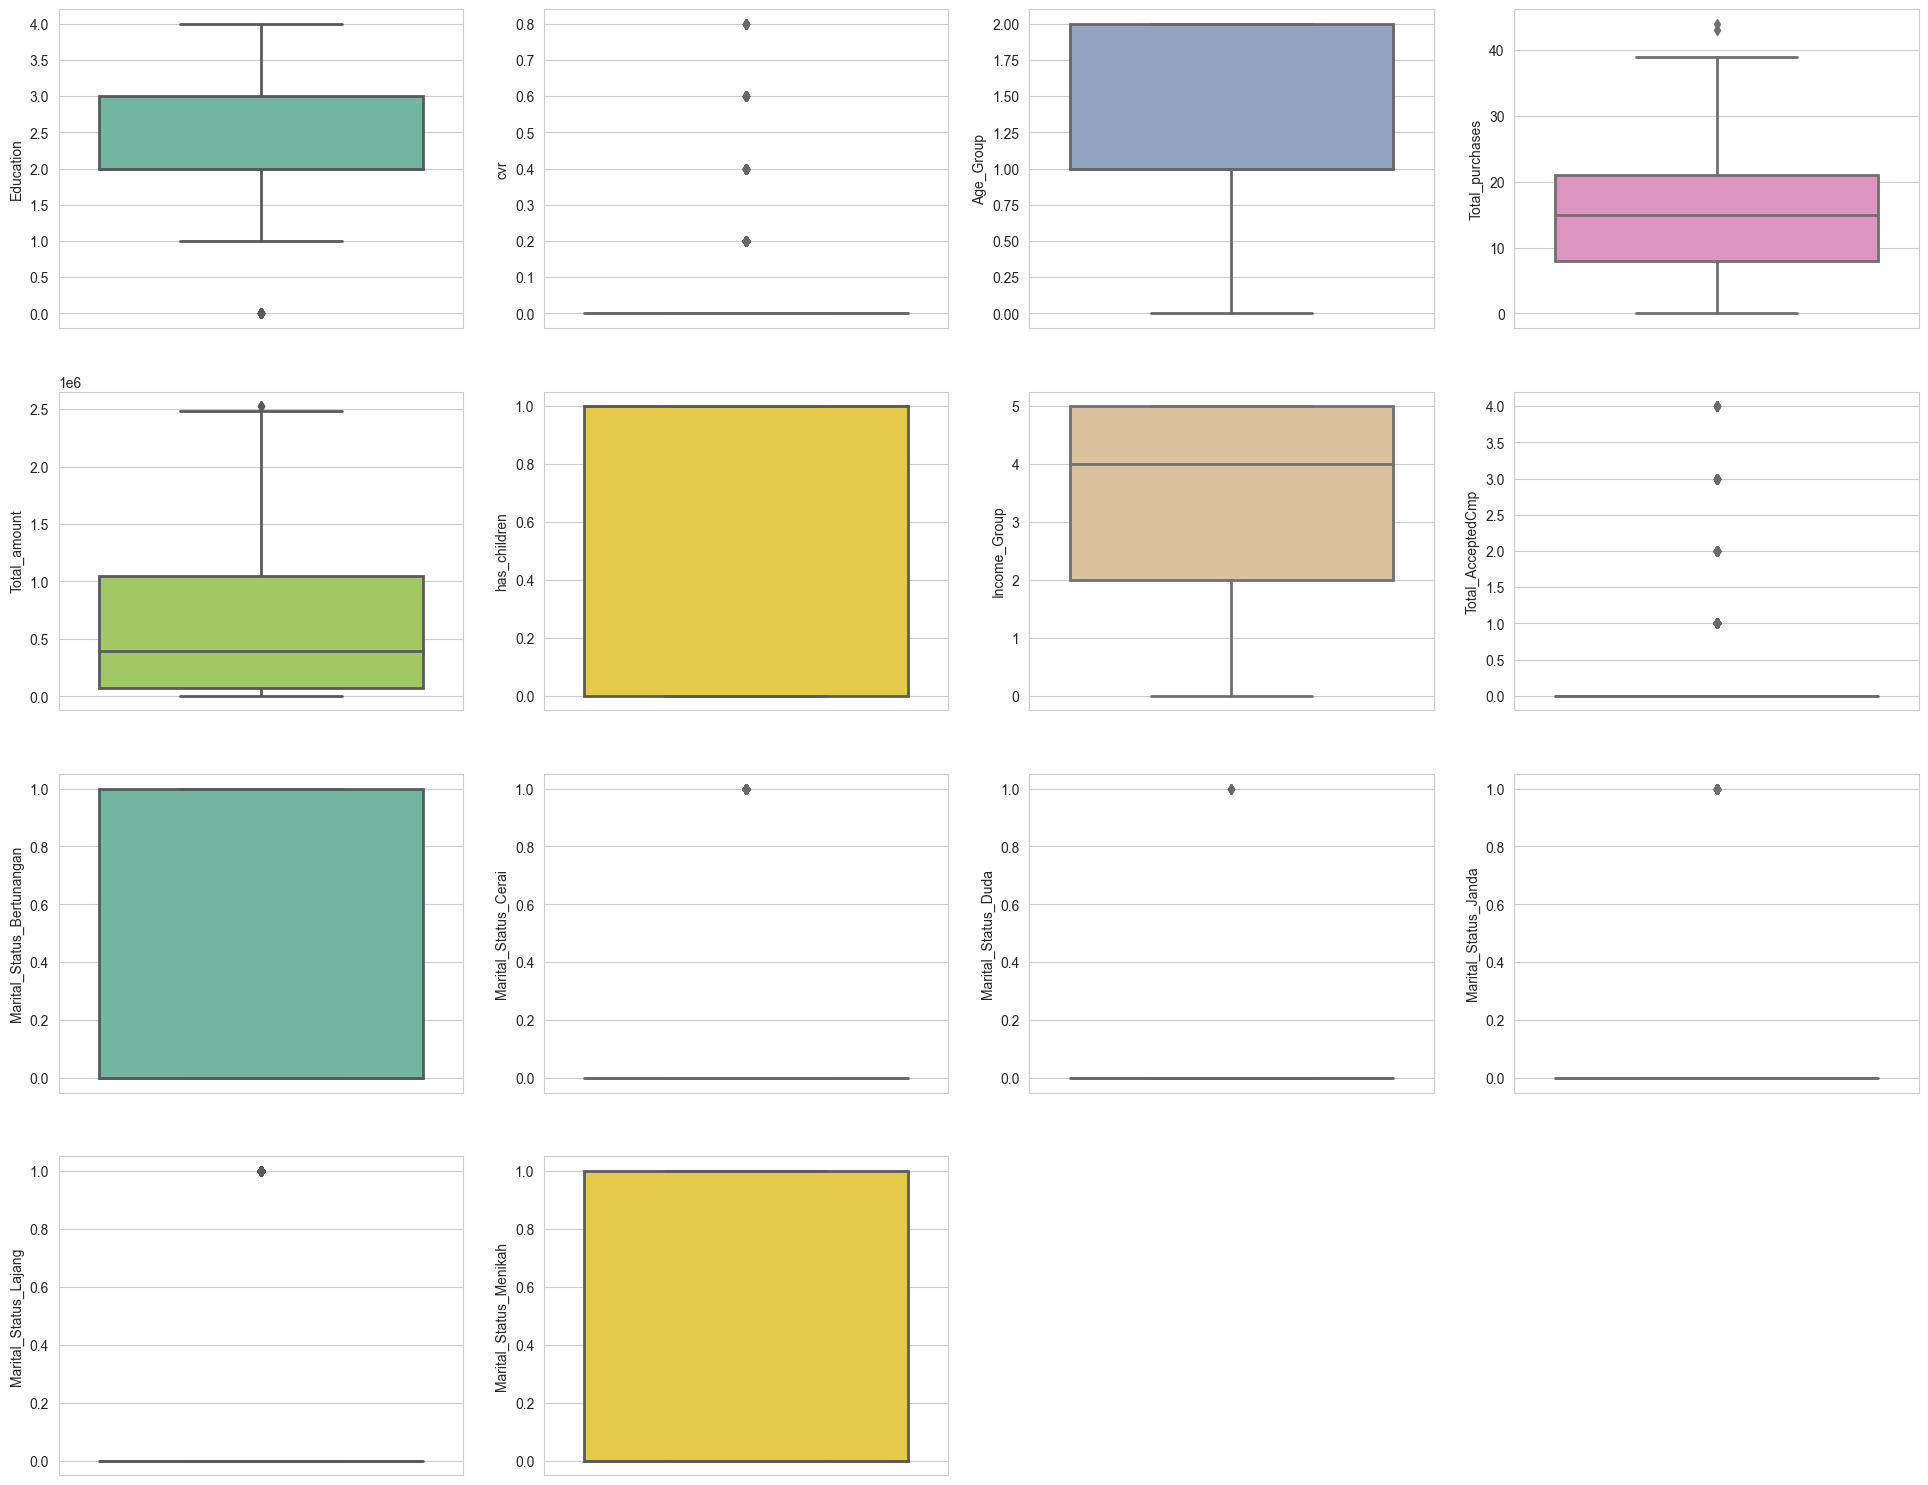

In [229]:
plt.figure(figsize=(24, 24))
for i in range (0, len(selection_feature)):
  plt.subplot(math.ceil(len(selection_feature)/3), 4, i+1)
  sns.boxplot(data=df_cluster, y=selection_feature[i], linewidth=2, orient='v', color = colorArr[i])

There are two columns, namely "cvr" and "Total_AcceptedCmp" with abnormal outliers. To address this issue and minimize the impact of missing data, the z-score is utilized.

In [230]:
feature_outlier = ['cvr', 'Total_AcceptedCmp']
print("Before removing outlier: ", len(df_cluster))
for i in feature_outlier:
    z_scores = np.abs(stats.zscore(df_cluster[i]))
    df_cluster = df_cluster[z_scores <= 3]
print("After removing outlier: ", len(df_cluster))

Before removing outlier:  2216
After removing outlier:  2080


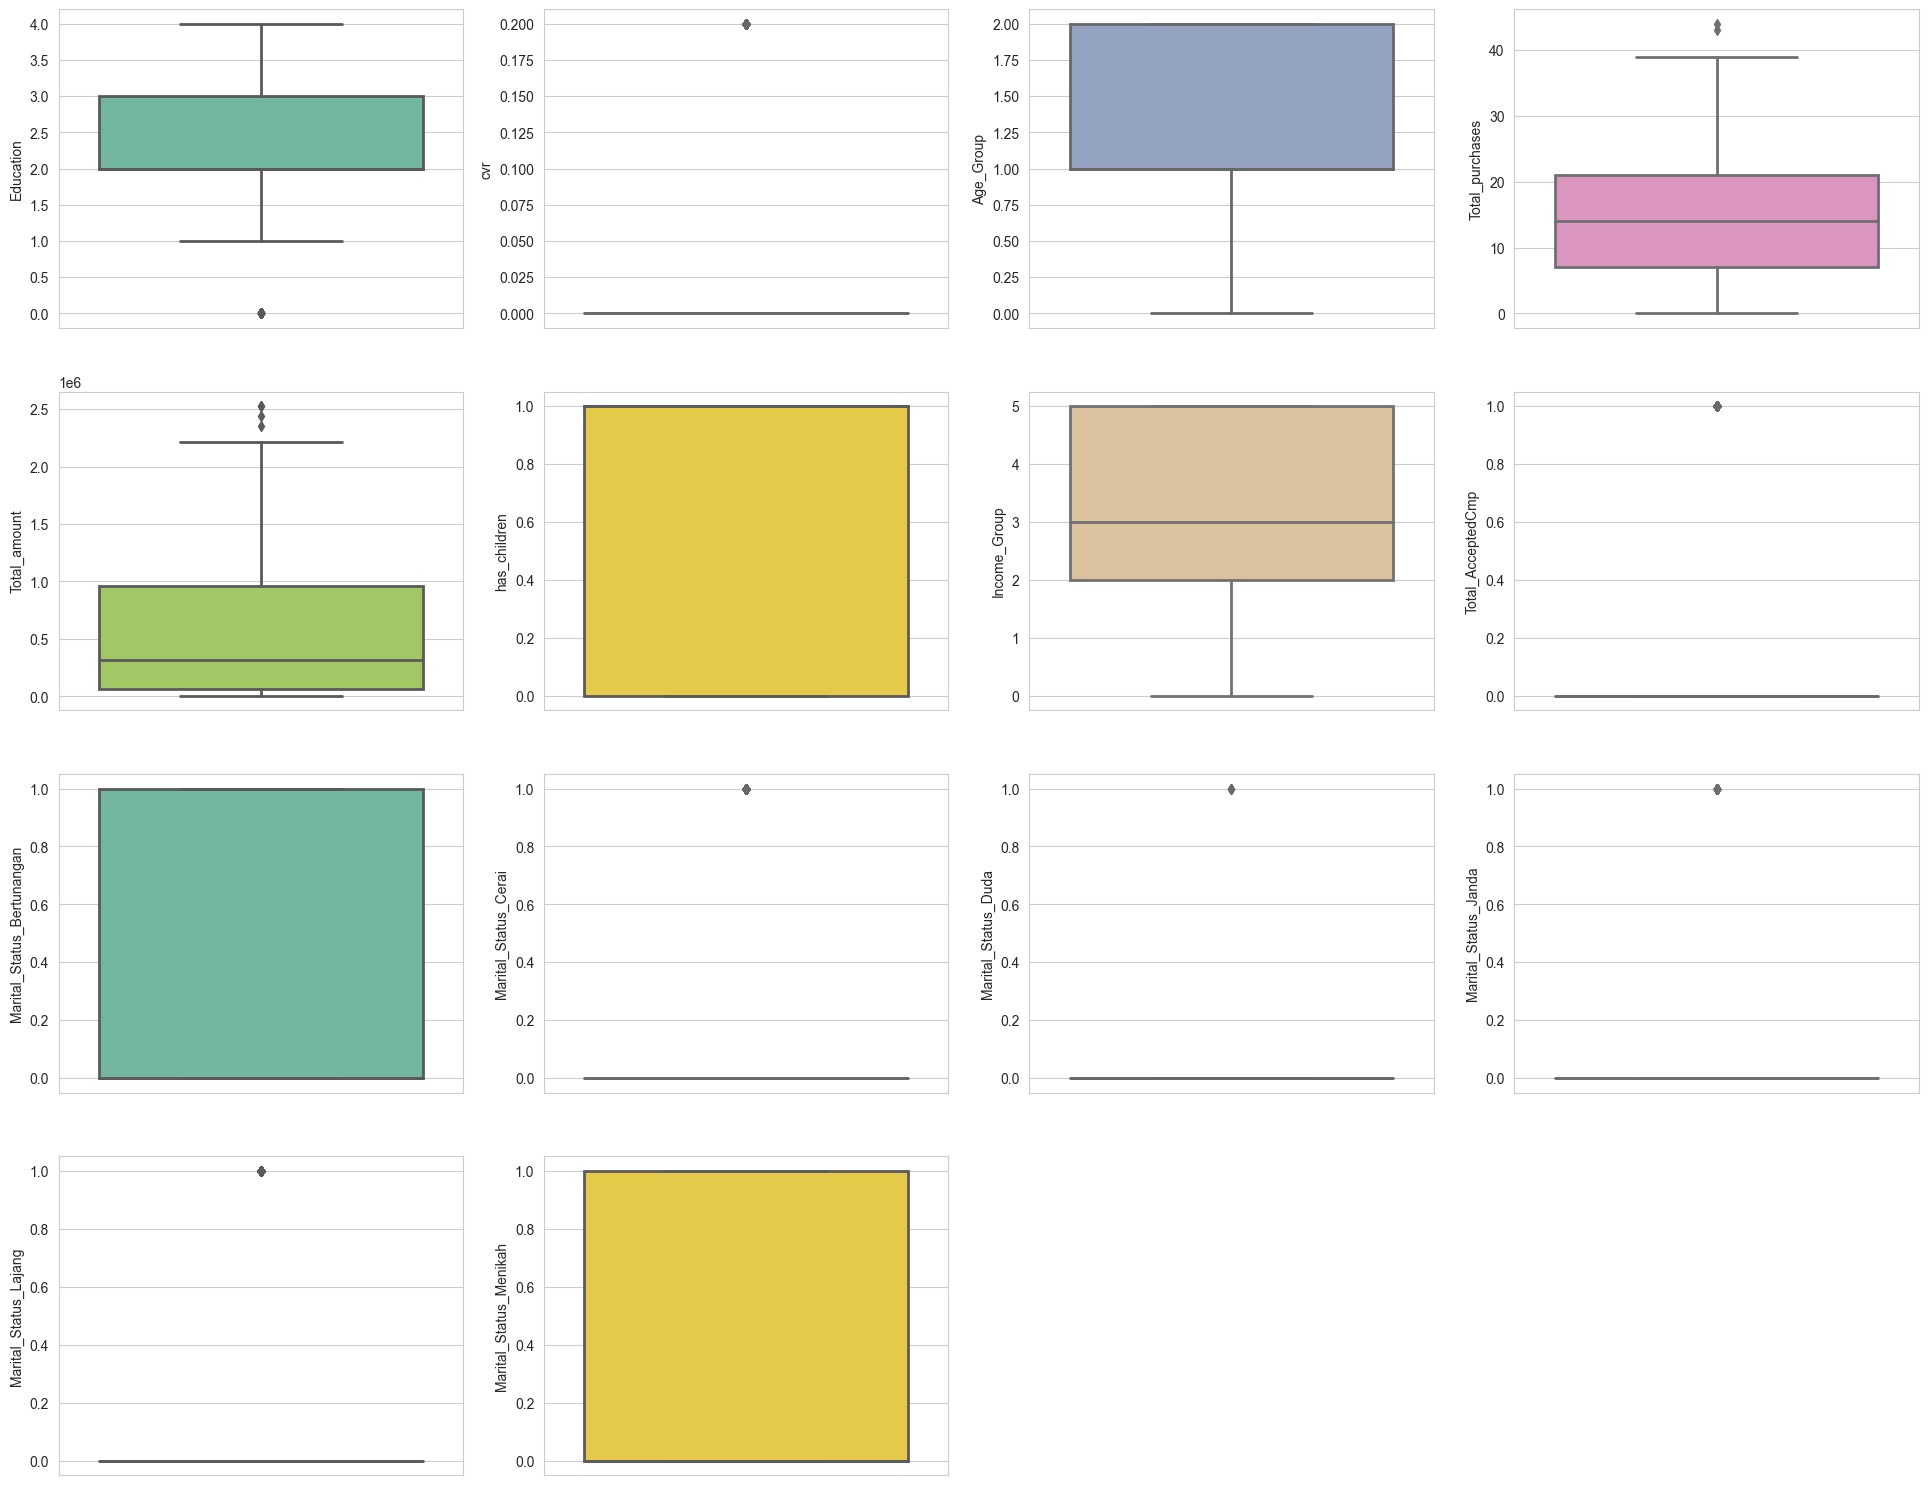

In [231]:
plt.figure(figsize=(24, 24))
for i in range (0, len(selection_feature)):
  plt.subplot(math.ceil(len(selection_feature)/3), 4, i+1)
  sns.boxplot(data=df_cluster, y=selection_feature[i], linewidth=2, orient='v', color = colorArr[i])

Following the application of z-score to handle outliers, it is evident that the number of outliers in "cvr" and "Total_AcceptedCmp" has been reduced.

## Feature Scaling


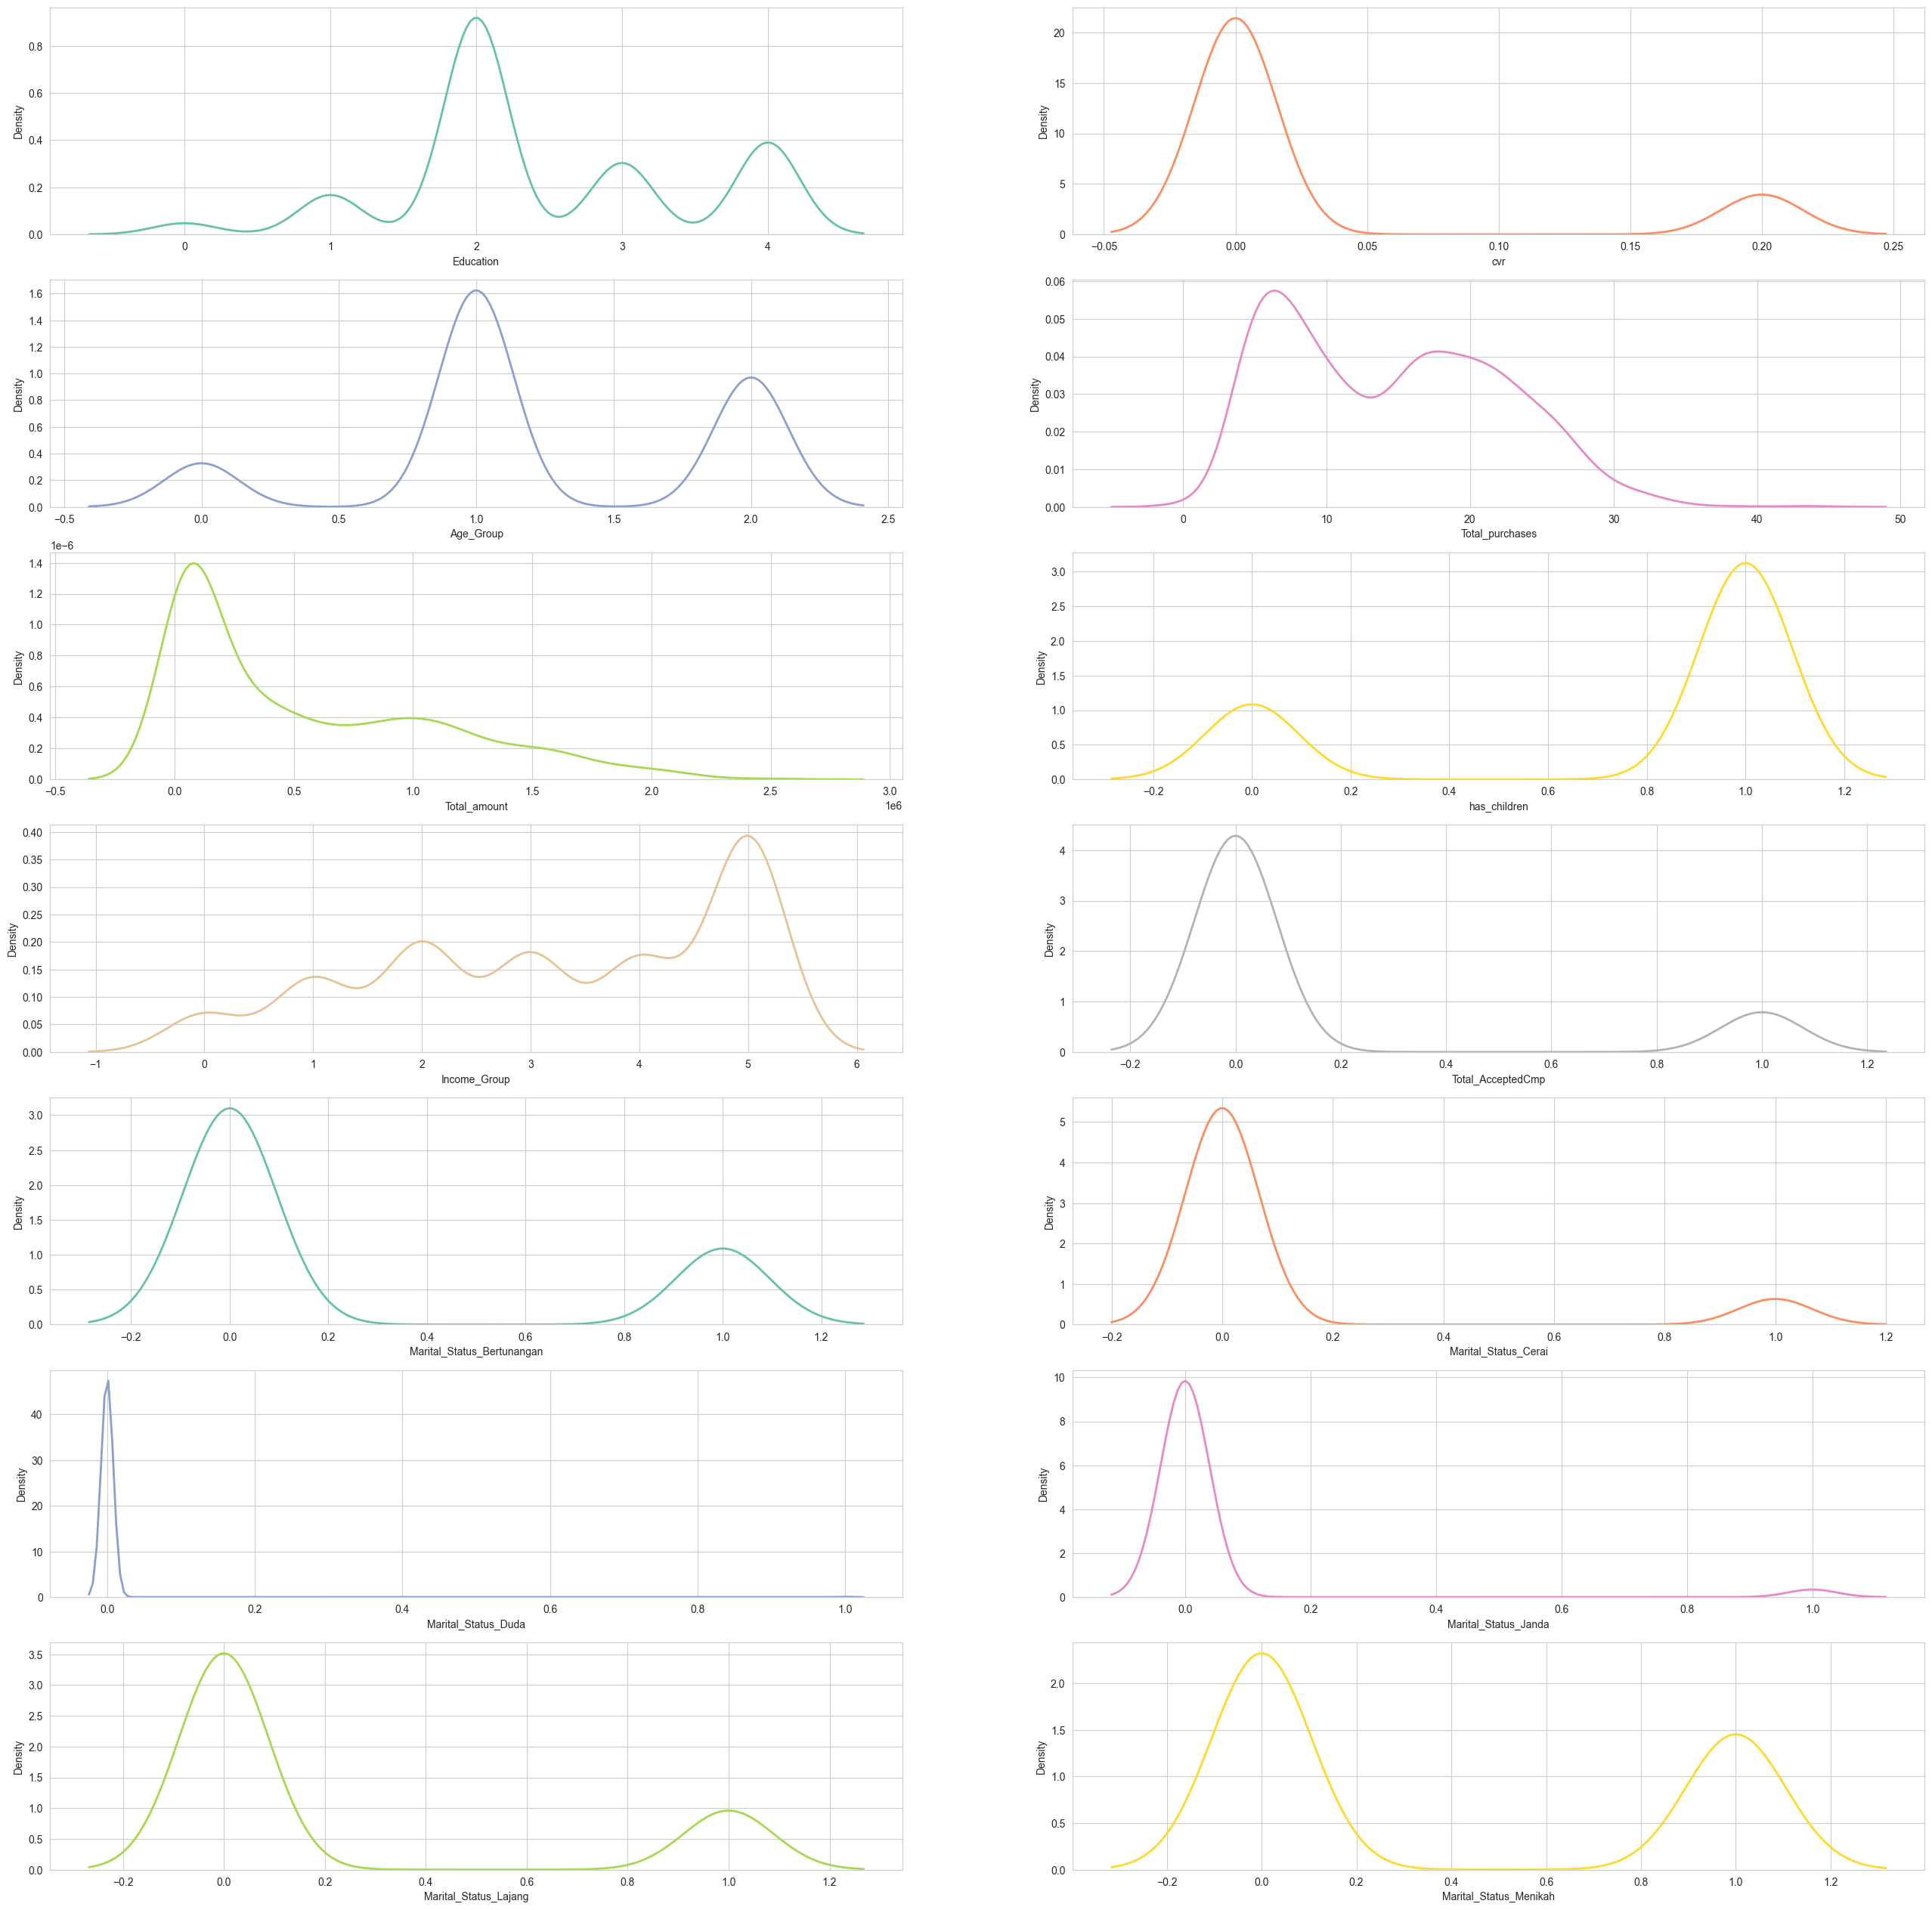

In [232]:
plt.figure(figsize=(32, 32))
for i in range (0, len(selection_feature)):
  plt.subplot(math.ceil(len(selection_feature)/2), 2, i+1)
  sns.kdeplot(data=df_cluster, x=selection_feature[i], linewidth=2, color = colorArr[i])

Given that not all columns exhibit a Gaussian/normal distribution, the MinMaxScaler will be employed for K-means clustering as it is more suitable in this scenario.

In [233]:
df_cluster_scaling = df_cluster[selection_feature].copy()
scaler = MinMaxScaler()
df_cluster_scaling[selection_feature] = scaler.fit_transform(df_cluster_scaling[selection_feature])
df_cluster_scaling

,Education,cvr,Age_Group,Total_purchases,Total_amount,has_children,Income_Group,Total_AcceptedCmp,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
0,0.50,0.0,1.0,0.568182,0.639683,0.0,0.8,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.50,0.0,1.0,0.136364,0.008730,1.0,0.6,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.50,0.0,0.5,0.477273,0.305952,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.50,0.0,0.0,0.181818,0.019048,1.0,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.00,0.0,0.5,0.431818,0.165476,1.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.50,0.0,0.5,0.409091,0.530159,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2236,1.00,1.0,1.0,0.500000,0.174206,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2237,0.50,1.0,0.5,0.431818,0.490476,0.0,0.8,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2238,0.75,0.0,1.0,0.522727,0.332540,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Correlation

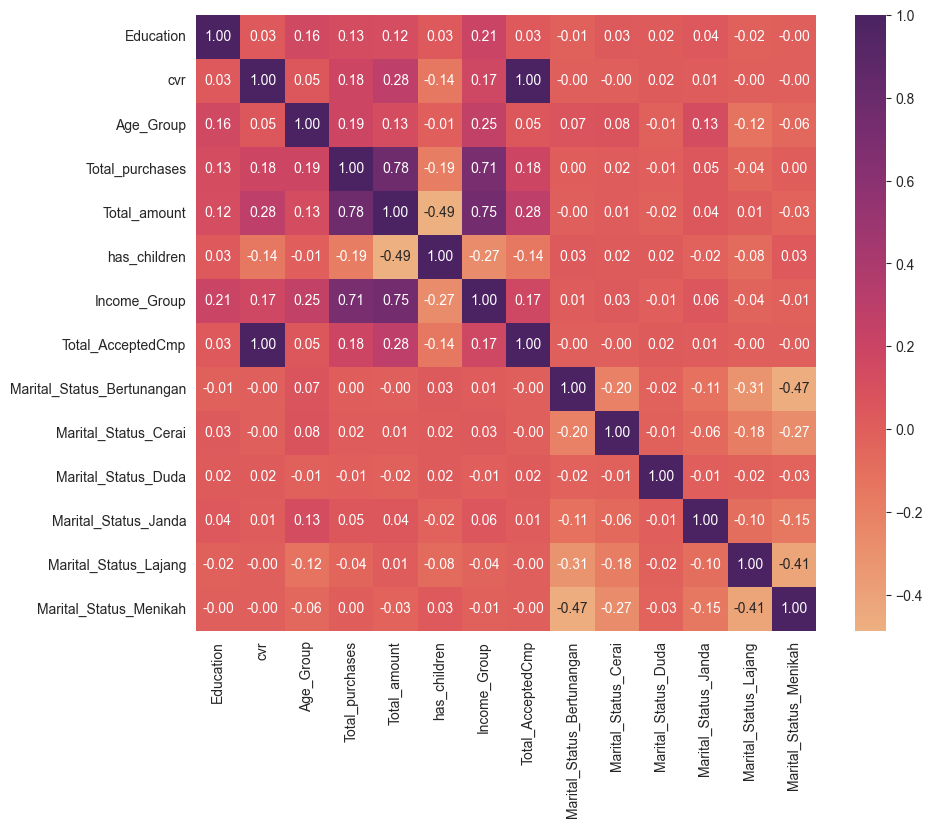

In [234]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_cluster_scaling.corr(), cmap='flare', annot=True, fmt='.2f')
plt.show()

To reduce dimensionality in the data, Marital_Status can be reduced as it is particularly the same. Additionally, 'Total_purchases,' 'Total_amount,' and 'Income_Group' exhibit high correlation. To achieve a better reduction, it might be beneficial to use Principal Component Analysis (PCA) and drop the correlated columns.

In [235]:
df_cluster_scaling['pca1'] = PCA(n_components=1).fit_transform(df_cluster_scaling[['Marital_Status_Bertunangan', 'Marital_Status_Cerai', 'Marital_Status_Duda', 'Marital_Status_Janda', 'Marital_Status_Lajang', 'Marital_Status_Menikah']])
df_cluster_scaling.drop(['Marital_Status_Bertunangan', 'Marital_Status_Cerai', 'Marital_Status_Duda', 'Marital_Status_Janda', 'Marital_Status_Lajang', 'Marital_Status_Menikah'], axis = 1, inplace = True)
df_cluster_scaling['pca1'] = PCA(n_components=1).fit_transform(df_cluster_scaling[['Total_purchases', 'Total_amount', 'Income_Group']])
df_cluster_scaling.drop(['Total_purchases', 'Total_amount', 'Income_Group'], axis = 1, inplace = True)
df_cluster_scaling

,Education,cvr,Age_Group,has_children,Total_AcceptedCmp,pca1
0,0.50,0.0,1.0,0.0,0.0,0.414470
1,0.50,0.0,1.0,1.0,0.0,-0.211245
2,0.50,0.0,0.5,0.0,0.0,0.375285
3,0.50,0.0,0.0,1.0,0.0,-0.506052
4,1.00,0.0,0.5,1.0,0.0,0.131399
...,...,...,...,...,...,...
2235,0.50,0.0,0.5,1.0,0.0,0.460971
2236,1.00,1.0,1.0,1.0,1.0,0.318642
2237,0.50,1.0,0.5,0.0,1.0,0.291480
2238,0.75,0.0,1.0,1.0,0.0,0.404880


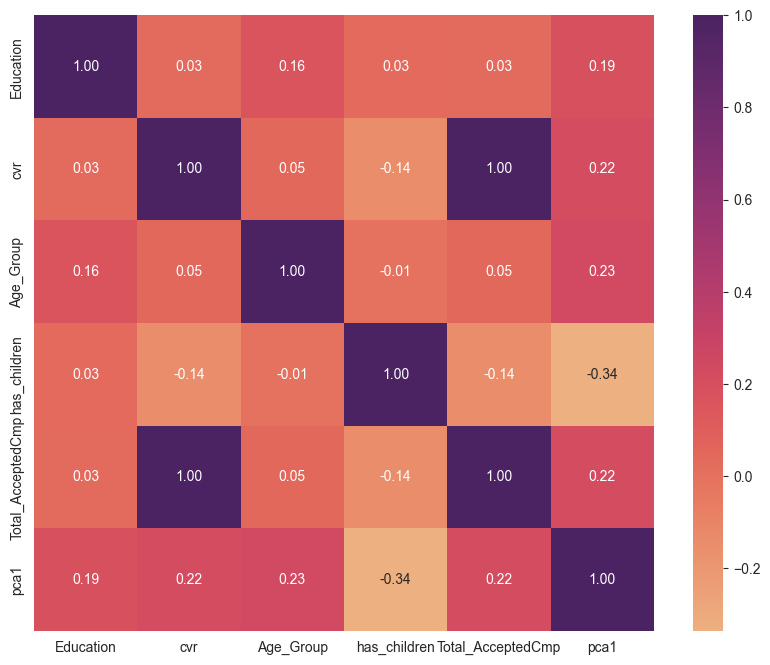

In [236]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_cluster_scaling.corr(), cmap='flare', annot=True, fmt='.2f')
plt.show()

Since "Total_AcceptedCmp" correlates perfectly (correlation coefficient of 1) with CVR, one of them must be dropped as it indicates redundancy in the data.

In [237]:
df_cluster_scaling.drop(['Total_AcceptedCmp'], axis = 1, inplace = True)
df_cluster.drop(['Total_AcceptedCmp'], axis = 1, inplace = True)

---
# Modeling
---

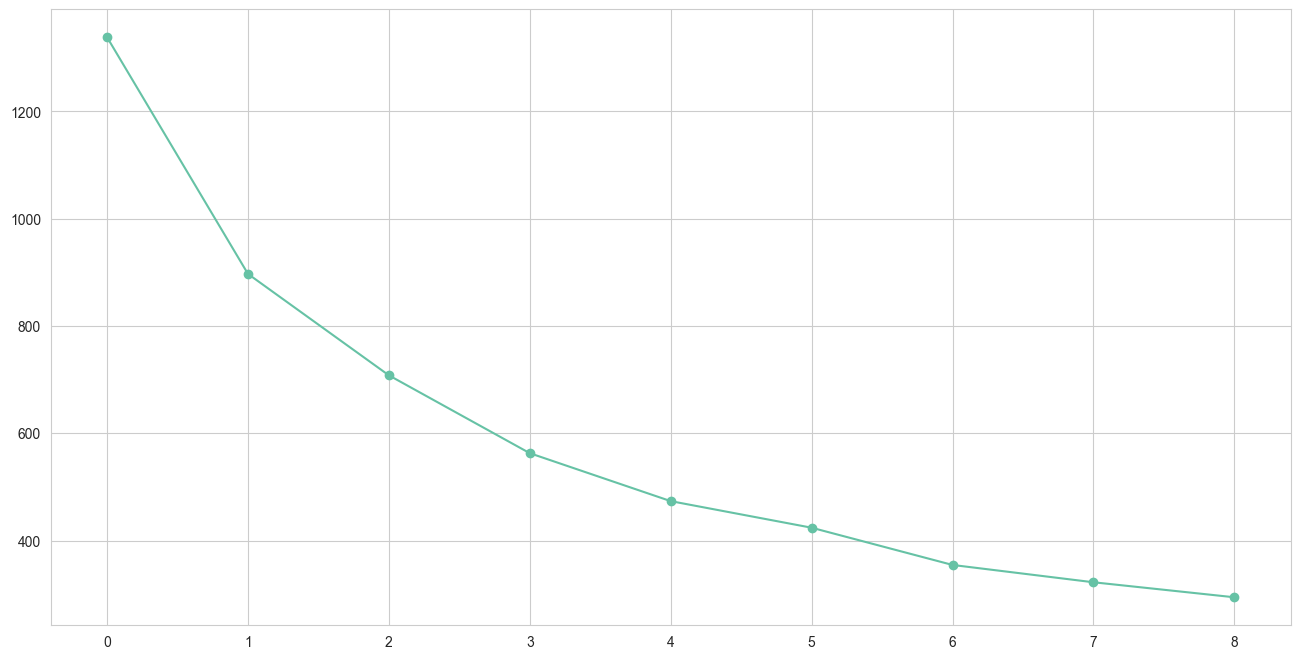

In [238]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=3)
    kmeans.fit(df_cluster_scaling)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16, 8))
plt.plot(inertia, 'o-')
plt.show()

In [239]:
inertia

[1338.0968474227645,
 896.9822500214408,
 707.9493820415892,
 562.8295379449228,
 473.49030976276606,
 423.9400273567414,
 354.52865451984036,
 322.255384222542,
 294.2825845629628]

According to the elbow method, the inertia changes significantly up to 3 clusters, and thereafter, the changes become less pronounced. So I have opted to use 3 clusters for this model.

In [240]:
kmeans = KMeans(n_clusters=3, random_state=3)
kmeans.fit(df_cluster_scaling)
df_cluster['labels'] = kmeans.labels_
df_cluster

,Education,cvr,Age_Group,Total_purchases,Total_amount,has_children,Income_Group,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,labels
0,2,0.0,2,25,1617000,0,4,0,0,0,0,1,0,0
1,2,0.0,2,6,27000,1,3,0,0,0,0,1,0,1
2,2,0.0,1,21,776000,0,5,1,0,0,0,0,0,0
3,2,0.0,0,8,53000,1,1,1,0,0,0,0,0,1
4,4,0.0,1,19,422000,1,4,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,0.0,1,18,1341000,1,5,0,0,0,0,0,1,1
2236,4,0.2,2,22,444000,1,5,1,0,0,0,0,0,2
2237,2,0.2,1,19,1241000,0,4,0,1,0,0,0,0,2
2238,3,0.0,2,23,843000,1,5,1,0,0,0,0,0,1


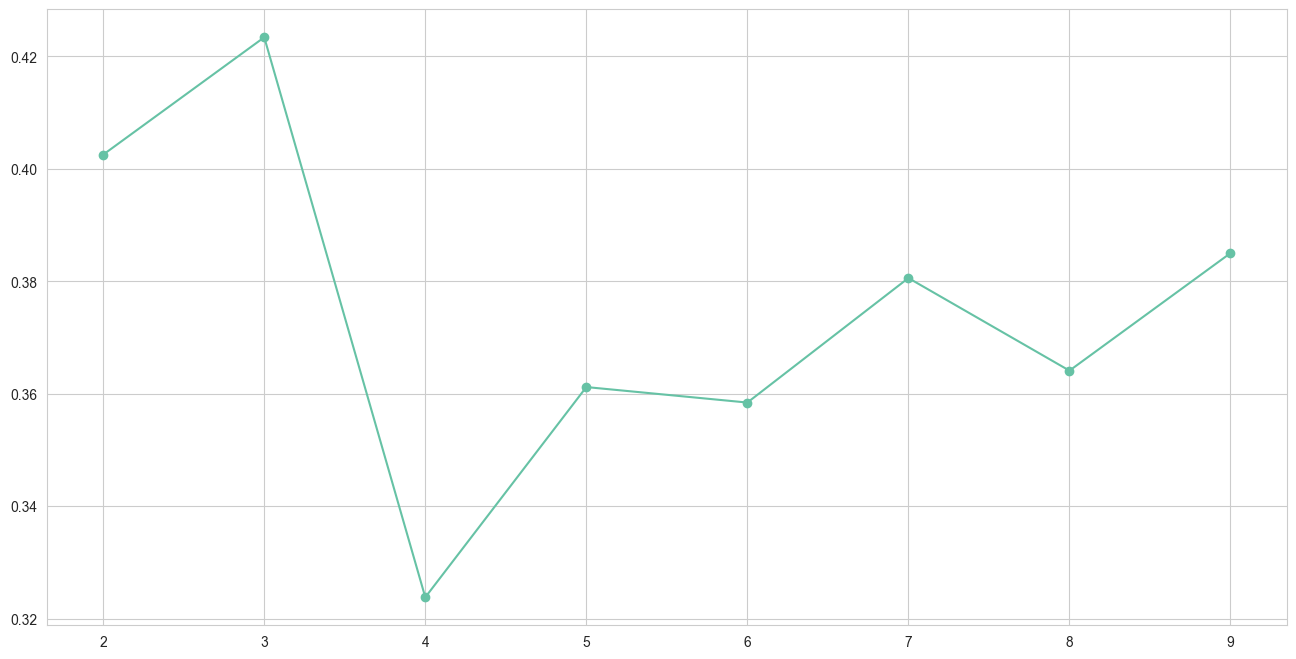

In [241]:
silhouette_score_avg = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=3)
    kmeans.fit(df_cluster_scaling)
    labels = kmeans.labels_
    silhouette_score_avg.append(silhouette_score(df_cluster_scaling, labels))

plt.figure(figsize=(16, 8))
plt.plot([2,3,4,5,6,7,8,9],silhouette_score_avg, 'o-')
plt.show()

In [242]:
silhouette_score_avg

[0.40253339058649545,
 0.4234093202375502,
 0.3237890021437839,
 0.3611854592410883,
 0.3584289543925667,
 0.3805794021764075,
 0.36410451029356483,
 0.38501137412546715]

The silhouette score analysis indicates that 3 clusters have the highest scores compared to other cluster options. Therefore, it can be concluded that using 3 clusters yields the best results for this model.

---
# Cluster Interpretation
---

In [243]:
df_interpretation = df_cluster.groupby(['labels']).agg(['min', 'max', 'median', 'mean']).reset_index()
df_interpretation

labels Education                       cvr                  Age_Group       
               min max median      mean  min  max median mean       min max   
0      0         0   4    2.0  2.377778  0.0  0.0    0.0  0.0         0   2  \
1      1         0   4    2.0  2.453402  0.0  0.0    0.0  0.0         0   2   
2      2         0   4    2.0  2.523220  0.2  0.2    0.2  0.2         0   2   

                   Total_purchases                       Total_amount   
  median      mean             min max median       mean          min   
0    1.0  1.190123               0  44   17.0  16.083951         6000  \
1    1.0  1.213018               0  43   11.0  13.230769         5000   
2    1.0  1.287926               2  35   19.0  17.767802        12000   

                                    has_children                        
       max    median           mean          min max median      mean   
0  2440000  981000.0  884069.135802            0   0    0.0  0.000000  \
1  2092000  158500.0  358882.396450            1   1    1.0  1.000000   
2  2525000  914000.0  917185.758514            0   1    1.0  0.594427   

  Income_Group                      Marital_Status_Bertunangan              
           min max median      mean                        min max median   
0            0   5    5.0  3.772840                          0   1    0.0  \
1            0   5    3.0  2.935651                          0   1    0.0   
2            0   5    5.0  3.904025                          0   1    0.0   

            Marital_Status_Cerai                      Marital_Status_Duda       
       mean                  min max median      mean                 min max   
0  0.241975                    0   1    0.0  0.086420                   0   0  \
1  0.266272                    0   1    0.0  0.111686                   0   1   
2  0.256966                    0   1    0.0  0.105263                   0   1   

                   Marital_Status_Janda                        
  median      mean                  min max median      mean   
0    0.0  0.000000                    0   1    0.0  0.041975  \
1    0.0  0.001479                    0   1    0.0  0.030325   
2    0.0  0.003096                    0   1    0.0  0.037152   

  Marital_Status_Lajang                      Marital_Status_Menikah       
                    min max median      mean                    min max   
0                     0   1    0.0  0.271605                      0   1  \
1                     0   1    0.0  0.197485                      0   1   
2                     0   1    0.0  0.213622                      0   1   

                    
  median      mean  
0    0.0  0.358025  
1    0.0  0.392751  
2    0.0  0.383901

Based on the table interpretation, three clusters can be defined with the following characteristics:

- **Cluster 0:**
  - These customers never take the campaign.
  - Predominantly Middle Adults.
  - 17 total purchases with Rp. 884,069 total amount spent.
  - Income is Rp. 37,000,000.
  - None of the customers in this cluster have children.
  - Can be defined as **Middle Spent Customer**

- **Cluster 1:**
  - Customers in this cluster never take the campaign.
  - Predominantly Middle Adults.
  - Lowest total purchases (13 times) and lowest total amount spent (Rp. 358,882).
  - Lowest income of Rp. 29,000,000.
  - Every customer in this cluster has children.
  - Can be defined as **Low Spent Customer**

- **Cluster 2:**
  - This cluster is more likely to accept the campaign (20% acceptance rate).
  - Predominantly Old Adults.
  - Highest total purchases (18 times) and highest total amount spent (Rp. 917,185).
  - Highest income of Rp. 39,000,000.
  - Not every customer in this cluster has children.
  - Can be defined as **High Spent Customer**

In [244]:
highFeature = ['labels', 'cvr', 'Age_Group', 'Total_purchases', 'Total_amount', 'has_children', 'Income_Group']
df_interpretation = df_interpretation[highFeature]
df_interpretation

labels  cvr                  Age_Group                      Total_purchases   
          min  max median mean       min max median      mean             min   
0      0  0.0  0.0    0.0  0.0         0   2    1.0  1.190123               0  \
1      1  0.0  0.0    0.0  0.0         0   2    1.0  1.213018               0   
2      2  0.2  0.2    0.2  0.2         0   2    1.0  1.287926               2   

                        Total_amount                                     
  max median       mean          min      max    median           mean   
0  44   17.0  16.083951         6000  2440000  981000.0  884069.135802  \
1  43   11.0  13.230769         5000  2092000  158500.0  358882.396450   
2  35   19.0  17.767802        12000  2525000  914000.0  917185.758514   

  has_children                      Income_Group                       
           min max median      mean          min max median      mean  
0            0   0    0.0  0.000000            0   5    5.0  3.772840  
1            1   1    1.0  1.000000            0   5    3.0  2.935651  
2            0   1    1.0  0.594427            0   5    5.0  3.904025

In [245]:
df_interpretation['labels'] = df_interpretation['labels'].replace([0, 1, 2], ['Middle Spent Customer', 'Low Spent Customer', 'High Spent Customer'])
df_interpretation

labels  cvr                  Age_Group                        
                          min  max median mean       min max median      mean   
0  Middle Spent Customer  0.0  0.0    0.0  0.0         0   2    1.0  1.190123  \
1     Low Spent Customer  0.0  0.0    0.0  0.0         0   2    1.0  1.213018   
2    High Spent Customer  0.2  0.2    0.2  0.2         0   2    1.0  1.287926   

  Total_purchases                       Total_amount                      
              min max median       mean          min      max    median   
0               0  44   17.0  16.083951         6000  2440000  981000.0  \
1               0  43   11.0  13.230769         5000  2092000  158500.0   
2               2  35   19.0  17.767802        12000  2525000  914000.0   

                 has_children                      Income_Group              
            mean          min max median      mean          min max median   
0  884069.135802            0   0    0.0  0.000000            0   5    5.0  \
1  358882.396450            1   1    1.0  1.000000            0   5    3.0   
2  917185.758514            0   1    1.0  0.594427            0   5    5.0   

             
       mean  
0  3.772840  
1  2.935651  
2  3.904025

In [246]:
df_cluster['labels'] = df_cluster['labels'].replace([0, 1, 2], ['Middle Spent Customer', 'Low Spent Customer', 'High Spent Customer'])
df_cluster

,Education,cvr,Age_Group,Total_purchases,Total_amount,has_children,Income_Group,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,labels
0,2,0.0,2,25,1617000,0,4,0,0,0,0,1,0,Middle Spent Customer
1,2,0.0,2,6,27000,1,3,0,0,0,0,1,0,Low Spent Customer
2,2,0.0,1,21,776000,0,5,1,0,0,0,0,0,Middle Spent Customer
3,2,0.0,0,8,53000,1,1,1,0,0,0,0,0,Low Spent Customer
4,4,0.0,1,19,422000,1,4,0,0,0,0,0,1,Low Spent Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,0.0,1,18,1341000,1,5,0,0,0,0,0,1,Low Spent Customer
2236,4,0.2,2,22,444000,1,5,1,0,0,0,0,0,High Spent Customer
2237,2,0.2,1,19,1241000,0,4,0,1,0,0,0,0,High Spent Customer
2238,3,0.0,2,23,843000,1,5,1,0,0,0,0,0,Low Spent Customer


## Visualization

### Distribution Feature

In [247]:
highFeature.remove('labels')

In [252]:
df_cluster

,Education,cvr,Age_Group,Total_purchases,Total_amount,has_children,Income_Group,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,labels
0,2,0.0,2,25,1617000,0,4,0,0,0,0,1,0,Middle Spent Customer
1,2,0.0,2,6,27000,1,3,0,0,0,0,1,0,Low Spent Customer
2,2,0.0,1,21,776000,0,5,1,0,0,0,0,0,Middle Spent Customer
3,2,0.0,0,8,53000,1,1,1,0,0,0,0,0,Low Spent Customer
4,4,0.0,1,19,422000,1,4,0,0,0,0,0,1,Low Spent Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,0.0,1,18,1341000,1,5,0,0,0,0,0,1,Low Spent Customer
2236,4,0.2,2,22,444000,1,5,1,0,0,0,0,0,High Spent Customer
2237,2,0.2,1,19,1241000,0,4,0,1,0,0,0,0,High Spent Customer
2238,3,0.0,2,23,843000,1,5,1,0,0,0,0,0,Low Spent Customer


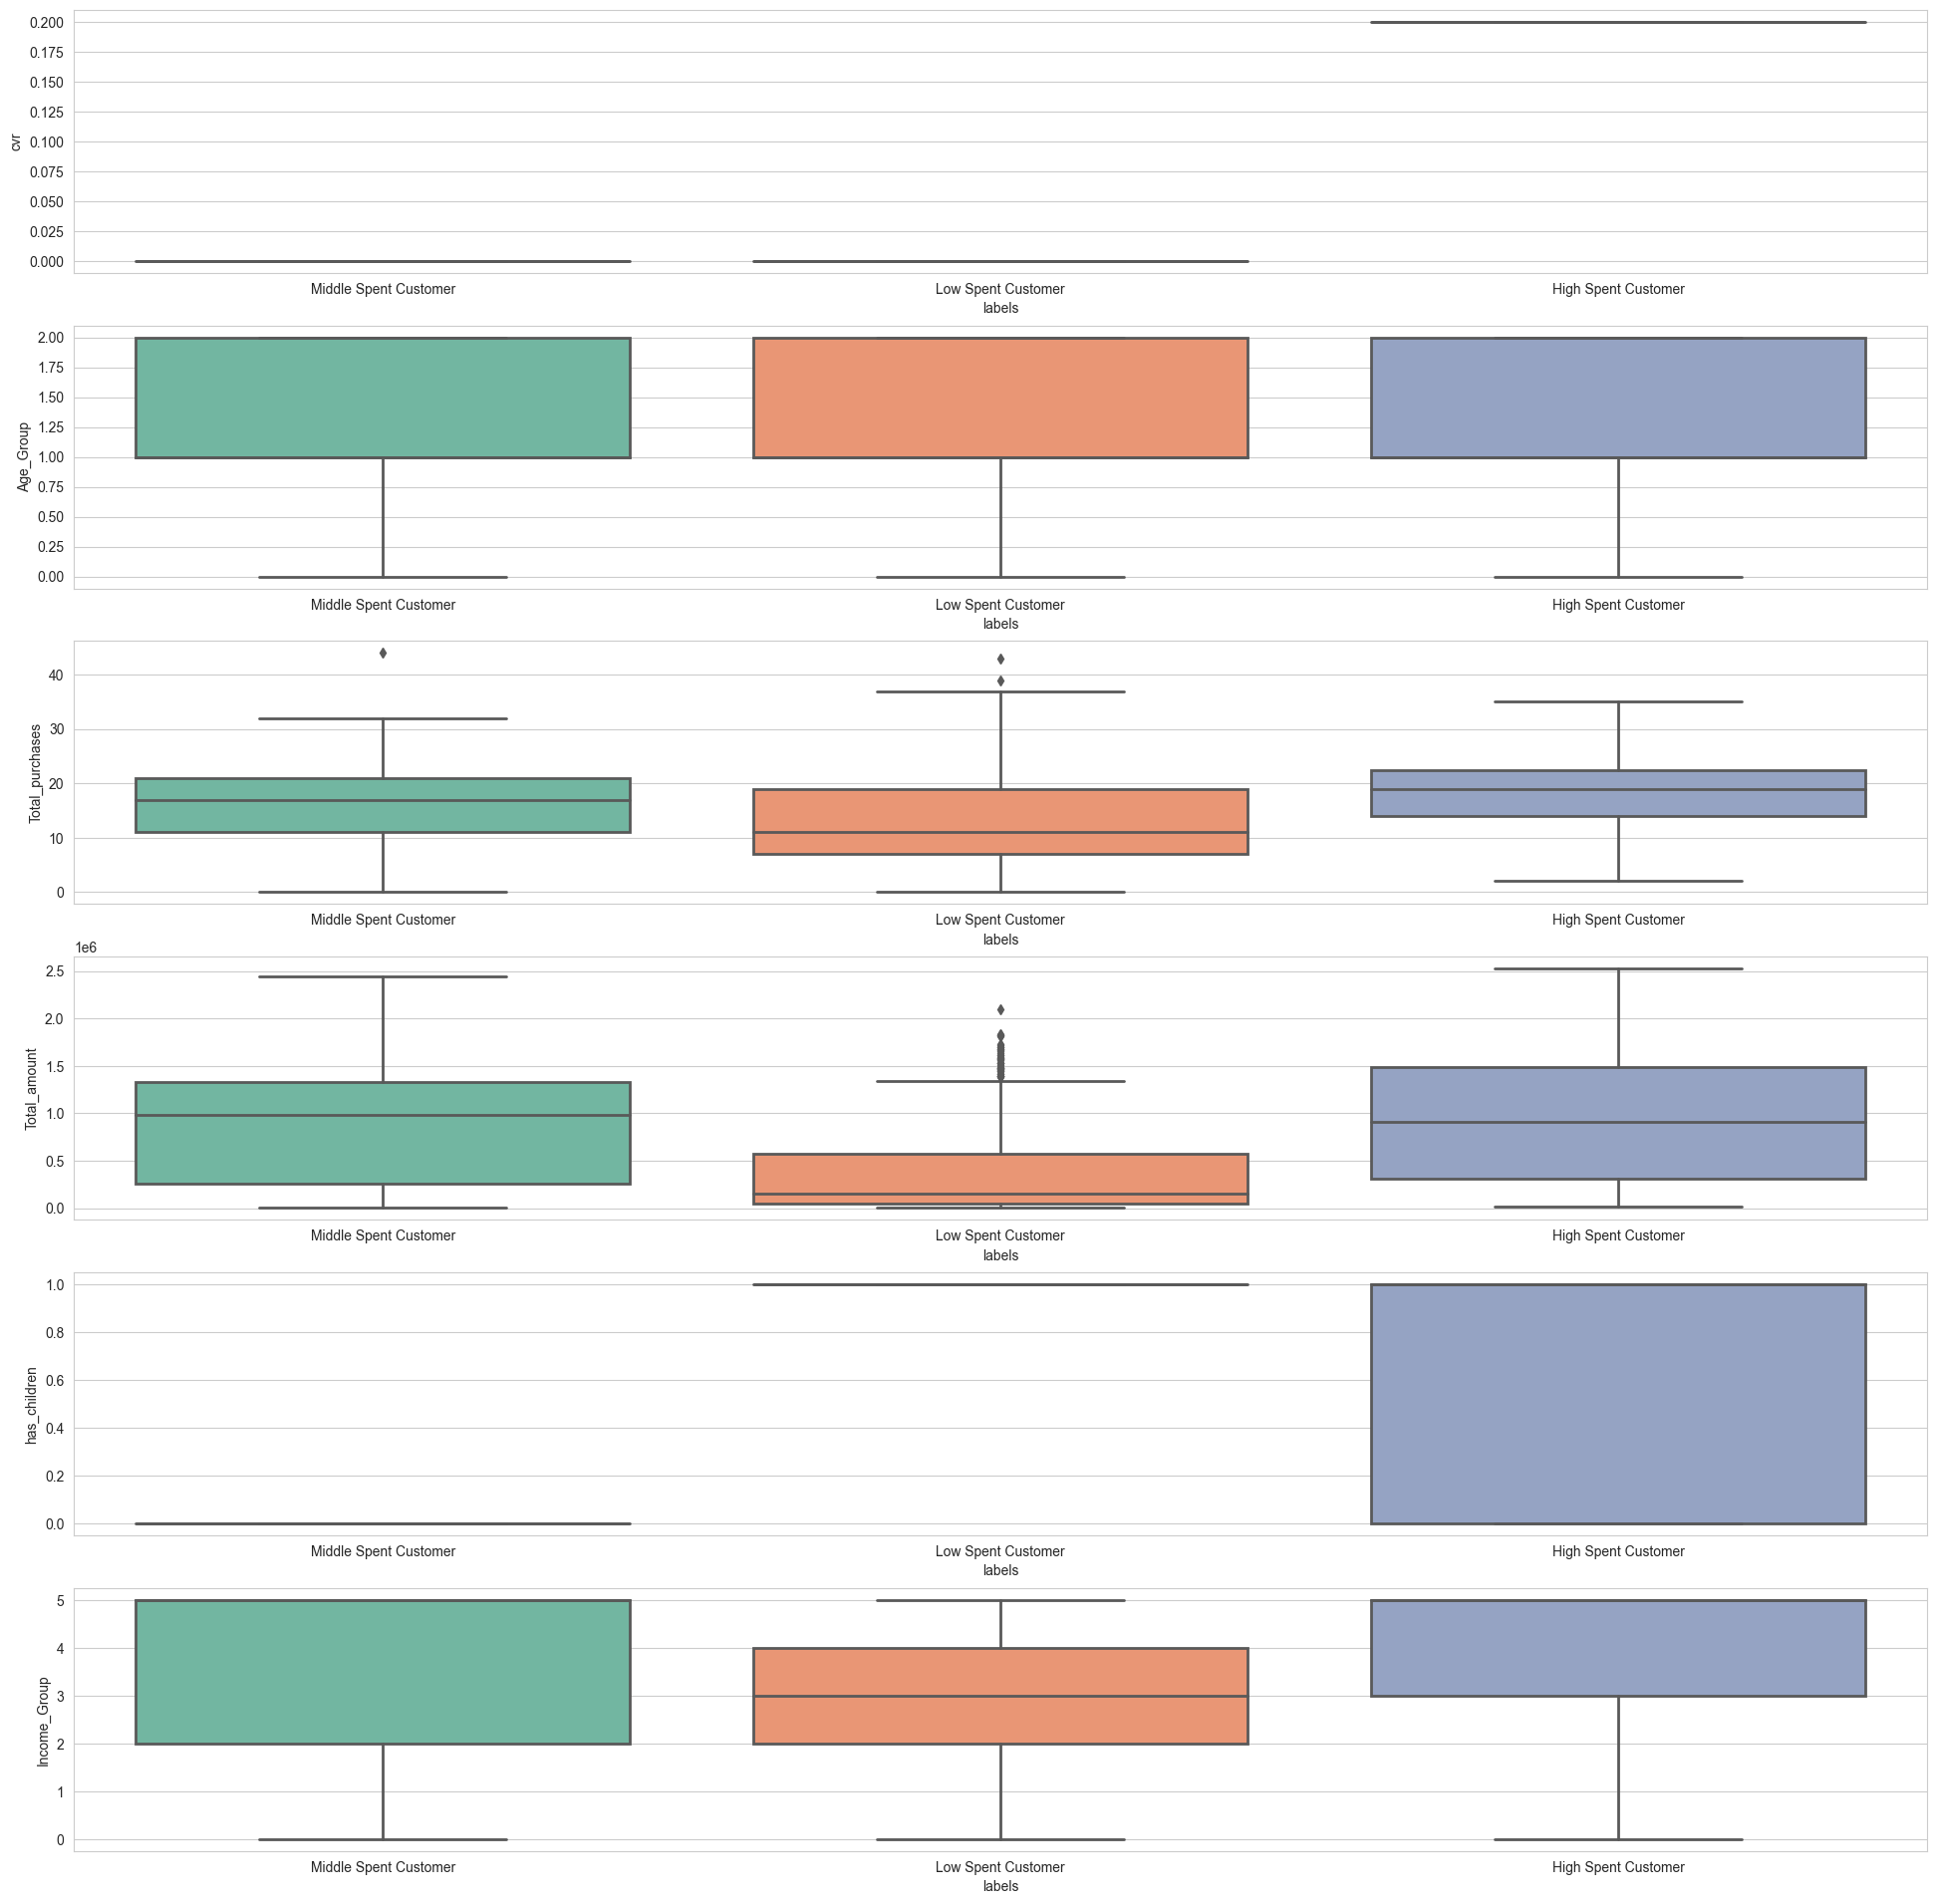

In [264]:
plt.figure(figsize=(24, 24))
for i in range (0, len(highFeature)):
  plt.subplot(math.ceil(len(highFeature)/1), 1, i+1)
  sns.boxplot(data=df_cluster, y=highFeature[i], x='labels',linewidth=2, orient='v')

Based on the distribution for each cluster, there are unique patterns as follows:

- **Conversion Rate for the campaign:**
   - Only High Spend Customers have a 20% acceptance rate, while the others have a 0% rate.

- **Total purchases:**
   - Low Spend Customers exhibit a variation in total purchases, with the majority being low.

- **Total amount:**
   - Middle Spend and High Spend customers have similar distributions, but High Spend customers show a more centralized in the high total amount.

- **Has children:**
   - Good distribution across clusters. In Middle Spent, there are no customers with children (0), Low Spent has only 1, and High Spent has an equal distribution.

- **Income group:**
   - Each cluster shows a distribution from 0 to 5. Low Spent is centralized in the middle to low-income range, Middle Spent is centralized in the middle to high-income range, and High Spent is centralized in the high-income range.

### Distribution Labels

In [271]:
df_count = df_cluster.groupby(['labels']).agg({'Education': 'count'}).reset_index()
df_count.columns = ['labels', 'count']
df_count

,labels,count
0,High Spent Customer,323
1,Low Spent Customer,1352
2,Middle Spent Customer,405


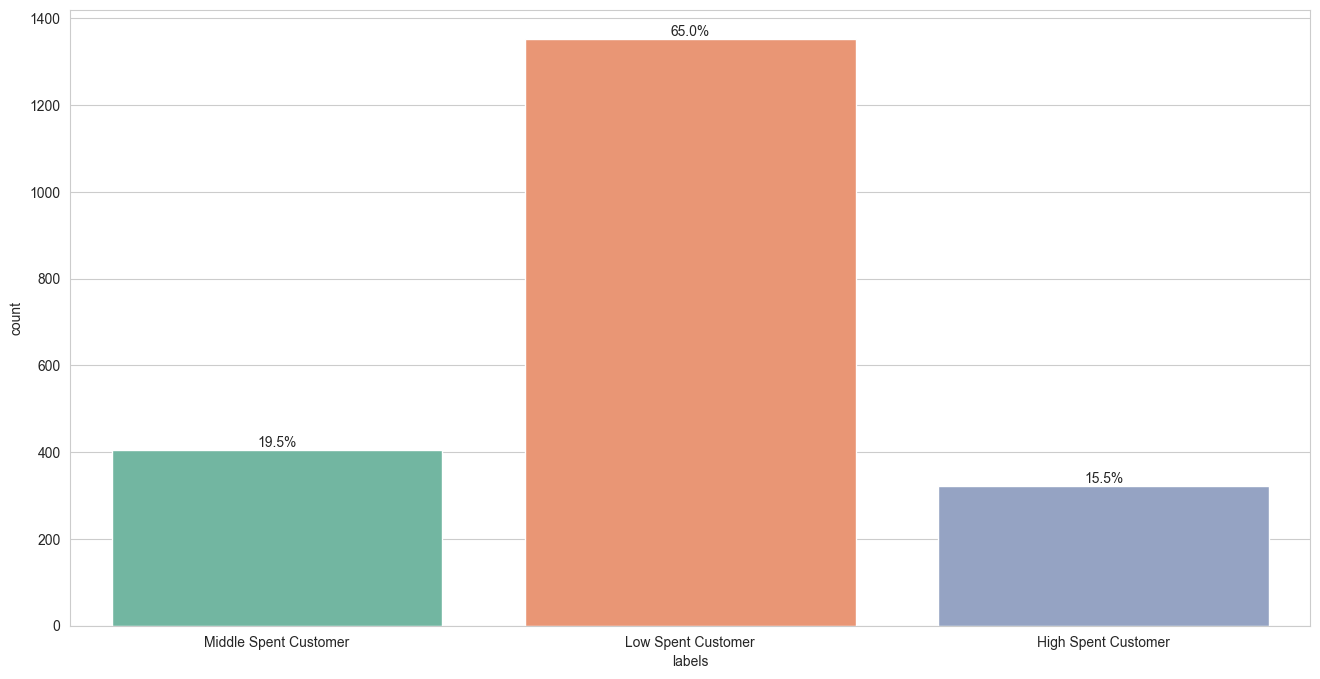

In [287]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(data=df_cluster, x='labels')
total = df_cluster['labels'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.show()

The majority of the customer is in Low Spent Customers 1352 (65%) followed by Middle Spent Customer 405 (19.5%) and High Spent Customer 323 (15.5%).

## Marketing Retargetting and Potential Impact

Given that only **High Spent Customers** accepted the campaign, which is 20% acceptance rate, so company can focus the campaign on this specific customer segment allowing for a more targeted approach. This targeted strategy can lead to cost savings of up to 84.5% with the same total revenue and total amount purchased, as the campaign is directed towards the group that has shown a positive response in terms of spending and acceptance of our campaign. Lastly, 84.5% money can be used for researching why the low and middle spent customer doesn't accept our campaign.

## Business Recommendation

Business recommendations for each cluster are well-thought-out and strategic. Here's a summary:

- **Low Spent Customer:**
  - Importance of Personalization: Given the significant size of this cluster (65%), personalized products and campaigns are crucial to engage and retain customers.
  - In-depth Research: Conduct further research to understand why customers in this cluster have low total purchases and zero Conversion Rates (CVR). This knowledge can help in targeting and converting more valuable customers.

- **Middle Spent Customer:**
  - Personalized Campaigns: Although this cluster has income levels not significantly different from High Spent Customers, they have not accepted campaigns. Implement personalized campaigns by tracking their website behavior to encourage engagement and conversions.

- **High Spent Customer:**
  - Targeted Campaigns: Continue providing campaigns exclusively to this cluster, as they have shown a willingness to accept campaigns. Focus marketing efforts on this group to maximize campaign effectiveness. 

- **All Customers:**
  - Gamification Strategy: Implement a gamification strategy, such as assigning ranks (Bronze, Silver, Gold, etc.) based on purchases or accepted campaigns. Offer promotions, discounts, and rewards that align with each rank, aiming to boost excitement and encourage more purchases and campaign acceptances.